<a href="https://colab.research.google.com/github/flaaa31/Explainable-AI-project/blob/main/Explainable_AI_project_ProfessionAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpretazione di una rete neurale per compliance normativa in ambito bancario
Banca Virtuosa, istituto di riferimento nel settore finanziario, ha identificato l'esigenza di migliorare la trasparenza e la comprensibilità dei modelli di intelligenza artificiale utilizzati nei propri sistemi. Per raggiungere questo obiettivo, Banca Virtuosa ha lanciato un progetto mirato all'implementazione di tecniche di Explainable AI (XAI), in conformità con la normativa vigente sulla trasparenza bancaria.

Attualmente, Banca Virtuosa utilizza modelli di classificazione pre-addestrati per analizzare e classificare dati finanziari critici. Tuttavia, la mancanza di trasparenza nelle decisioni di questi modelli può compromettere la fiducia dei clienti e limitare la capacità della banca di migliorare i propri sistemi in modo mirato. Identificare e correggere gli errori di classificazione è cruciale per garantire accuratezza e affidabilità nei servizi offerti.

**Benefici della Soluzione**

1. **Trasparenza nelle Decisioni del Modello**: Implementando tecniche di XAI come Grad-CAM, LIME, SHAP, Integrated Gradients e Occlusion Maps, Banca Virtuosa sarà in grado di generare mappe di salienza che mostrano visivamente quali elementi influenzano le decisioni del modello. Questo incremento di trasparenza migliorerà la fiducia dei clienti e degli stakeholder, dimostrando l'affidabilità e la spiegabilità delle operazioni del sistema di classificazione.
2. **Miglioramento Continuo delle Performance**: Analizzando le mappe di salienza, Banca Virtuosa potrà identificare con precisione le aree in cui il modello commette errori, sia nelle classificazioni corrette che in quelle errate. Questa analisi dettagliata permetterà di apportare miglioramenti mirati al modello, ottimizzando le sue performance e riducendo il rischio di interpretazioni errate dei dati.
3. **Conformità Normativa**: Il progetto garantirà che le decisioni dei modelli di intelligenza artificiale siano spiegabili, in linea con i requisiti normativi vigenti. La trasparenza delle decisioni AI è essenziale per la conformità normativa e la governance aziendale, particolarmente in settori regolamentati come quello finanziario.
4. **Promozione dell'Innovazione**: L'utilizzo di tecniche avanzate di XAI all'interno di Banca Virtuosa promuoverà l'innovazione nel campo dell'intelligenza artificiale. Questo rafforzerà la posizione della banca come pioniere nell'adozione di tecnologie avanzate, consentendo di offrire ai clienti soluzioni sempre più sofisticate e affidabili.
**Dettagli del Progetto**

Fase 1: Utilizzo di un Modello di Classificazione Pre-Addestrato
* Modello: Utilizzare un modello pre-addestrato, come DenseNet, dalla libreria torchvision.
* Dataset: Applicare il modello a un dataset di immagini, ad esempio MNIST, per esplorare le sue decisioni di classificazione.

Fase 2: Generazione di Mappe di Salienza
* Tecniche di XAI: Implementare tecniche come Grad-CAM, LIME, SHAP, Integrated Gradients e Occlusion Maps per generare mappe di salienza del modello.

Fase 3: Report Finale
* Descrizione del Dataset: Dettagliare l'origine, la struttura e le caratteristiche del dataset utilizzato.
* Analisi delle Mappe di Salienza: Confrontare le mappe di salienza per classi corrette ed errate per identificare e comprendere gli errori del modello.
* Sistema Spiegabile (Opzionale): Descrivere un sistema completamente spiegabile che potrebbe eseguire la stessa classificazione, offrendo ulteriori insights sulle decisioni del modello.

**Obiettivi del Progetto**

1. Comprensione del Modello: Utilizzare tecniche di XAI per ottenere una comprensione approfondita del funzionamento interno del modello pre-addestrato.
2. Visualizzazione delle Decisioni: Visualizzare in modo chiaro e interpretabile quali elementi influenzano le decisioni del modello attraverso le mappe di salienza.
3. Identificazione degli Errori: Analizzare le mappe di salienza per identificare e comprendere gli errori del modello, distinguendo tra classificazioni corrette ed errate.
4. Creazione di Sistemi Spiegabili: Se possibile, sviluppare o descrivere un sistema completamente spiegabile che possa effettuare la stessa classificazione, fornendo ulteriori insights sulle decisioni del modello.

**Motivazione del Progetto**  
Le tecniche di Explainable AI sono essenziali per Banca Virtuosa per migliorare la trasparenza, ottimizzare le performance dei modelli e garantire la conformità normativa. Con questo progetto, la banca mira a rafforzare la fiducia dei clienti, migliorare l'efficienza operativa e promuovere l'innovazione nel campo dell'intelligenza artificiale.

# Phase 1: Training a deep learning model for a classification task (in our case, handwritten digits classification)

## Import and install modules

In [1]:
! pip install captum lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 63.7 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=02526393de6251943f128e32aadc43b867ea5b03c17c9f597d8fc5d2641d1dac
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 require

In [2]:
# import
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import random
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import torch.nn.functional as F
from captum.attr import Saliency, Occlusion, GradientShap, IntegratedGradients, LayerGradCam
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
from skimage.color import gray2rgb, label2rgb
from google.colab import drive
import os
import shap
from sklearn.tree import DecisionTreeClassifier, plot_tree, _tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [3]:
# device setting
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


## Dataset Download (MNIST)

In [4]:
# standard images transformation (normalization and tensor conversion)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [5]:
# Train and test dataset download (MNIST)
train_dataset = datasets.MNIST(root='./data', train=True,
                              download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False,
                             download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 487kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.53MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.08MB/s]


In [6]:
# images shape
print(f"Train dataset images shape: {train_dataset[0][0].shape}")
print(f"Test dataset images shape: {test_dataset[0][0].shape}")

Train dataset images shape: torch.Size([1, 28, 28])
Test dataset images shape: torch.Size([1, 28, 28])


# EDA

In [7]:
# dataset dimensions
print(f"Train dataset shape: {len(train_dataset)} images")
print(f"Test dataset shape: {len(test_dataset)} images")

Train dataset shape: 60000 images
Test dataset shape: 10000 images


In [8]:
# labels
classes = train_dataset.classes
classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [9]:
# converting an image from tensor to numpy format for viewing purposes
def back_to_image(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    return np.transpose(npimg, (1, 2, 0))

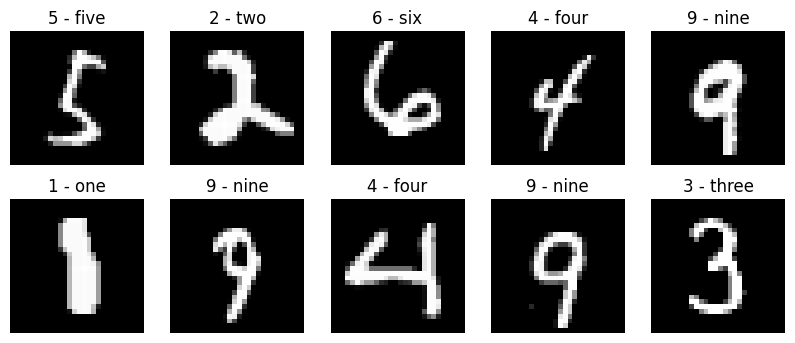

In [10]:
# show random images belonging to dataset

def print_random_images(dataset, num_rows, num_cols, class_names):
    num_images = num_rows * num_cols
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))

    for i in range(num_rows):
        for j in range(num_cols):
            index = random.randint(0, len(dataset) - 1)  # Random image selected
            image = back_to_image(dataset[index][0])  # Random image converted
            label = dataset[index][1]  # class
            axs[i, j].imshow(image, cmap = "gray") # black and white images
            axs[i, j].set_title(class_names[label])  # show class name
            axs[i, j].axis('off')  # hide axis

    plt.show()


print_random_images(train_dataset, num_rows=2, num_cols=5, class_names=classes)  # Print 10 trainset random images, 2 lines and 5 columns

In [11]:
# Check if classes are balanced

train_labels = [label for _, label in train_dataset]
test_labels = [label for _, label in test_dataset]

train_label_counts = {label: train_labels.count(label) for label in range(10)}
test_label_counts = {label: test_labels.count(label) for label in range(10)}

print("Train Label Counts:", train_label_counts)
print("Test Label Counts:", test_label_counts)

Train Label Counts: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test Label Counts: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [12]:
# plot of classes distribution

# adding dataset names, for viewing purposes
train_dataset.name = "Train"
test_dataset.name = "Test"

def plot_label_counts(dataset):

  labels = [label for _, label in dataset]
  label_counts = {label: labels.count(label) for label in range(10)}

  # label counts plot
  plt.figure(figsize=(10, 6))
  bars = plt.bar(label_counts.keys(), label_counts.values(),
                color='steelblue', alpha=0.7, edgecolor='black', linewidth=0.5)

  # Adding values up
  for bar in bars:
      height = bar.get_height()
      plt.text(bar.get_x() + bar.get_width()/2., height + 10,
              f'{int(height)}', ha='center', va='bottom')

  plt.xlabel('Label')
  plt.ylabel('Number of samples')
  plt.title(f"Class Distribution in '{dataset.name}' Dataset")
  plt.xticks(range(10))  # Show all ticks in X-axis
  plt.grid(True, alpha=0.3)
  plt.tight_layout()
  plt.show()

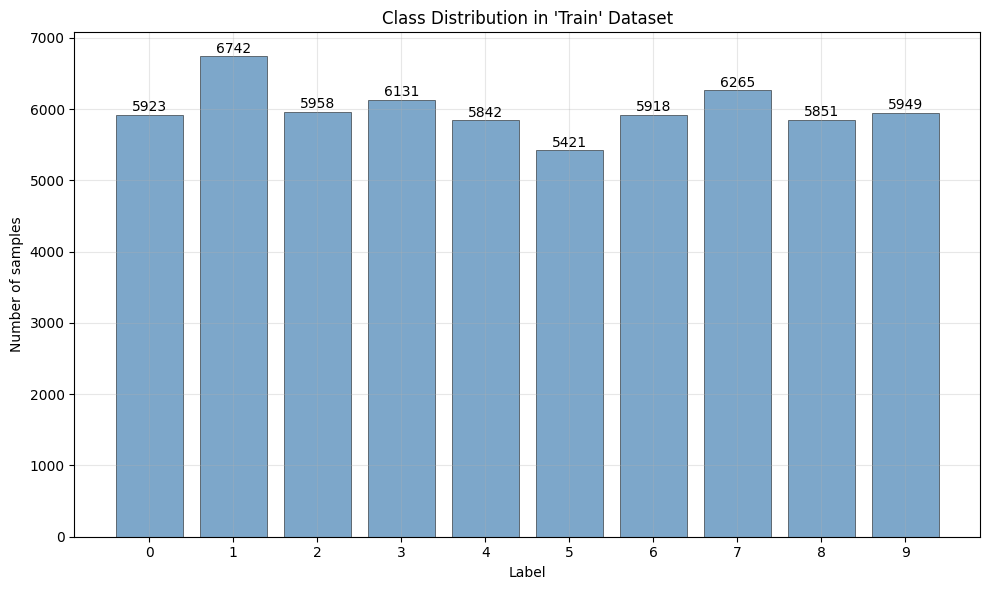

In [13]:
plot_label_counts(train_dataset)

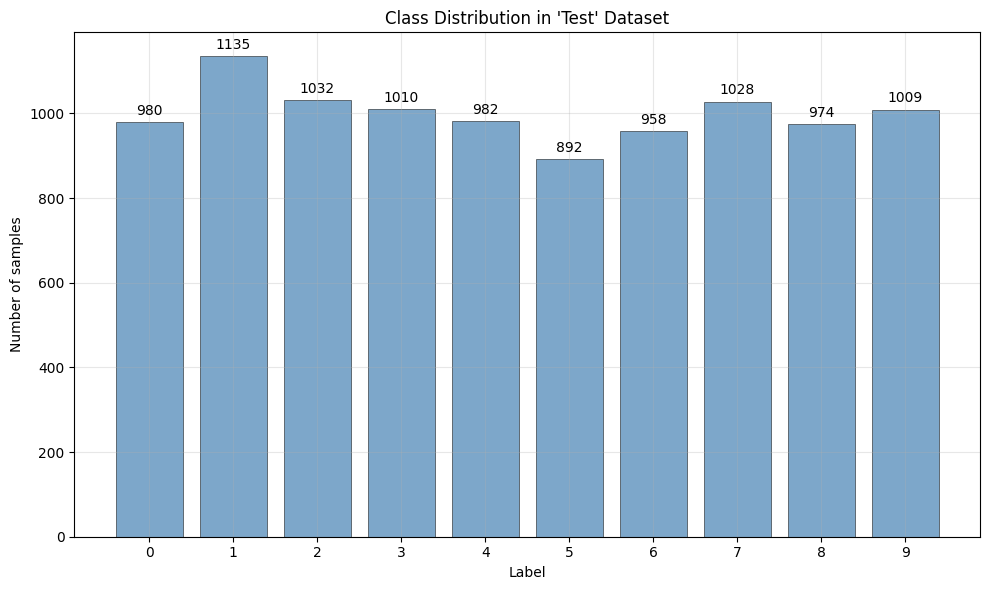

In [14]:
plot_label_counts(test_dataset)

# Model selection and performances evaluation using a neural network
architecture taken from https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

(It's not the best model you could possibly use, but it has some decent performance and it's fast to train, the purpose of this project is to focus on XAI techniques, so the model used is almost irrelevant, you can change it with something else, if you want)

In [15]:
class MNISTBaseline(nn.Module):
    def __init__(self):
        super(MNISTBaseline, self).__init__()
        # Conv2D(32, (3,3)) -> Conv2d(1, 32, kernel_size=3)
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=0)
        # MaxPooling2D((2,2)) -> MaxPool2d(2)
        self.pool1 = nn.MaxPool2d(2)
        # Dense(100) -> Linear(13*13*32, 100)
        self.fc1 = nn.Linear(13*13*32, 100)  # 26x26 -> 13x13 after pooling
        # Dense(10) -> Linear(100, 10)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
      # Input x shape: [N, 1, 28, 28]
      # N = Batch size (number of images in the batch)
      # 1 = Color channels (since the images are grayscale)
      # 28, 28 = Height and width of the image in pixels

      # First convolutional layer + ReLU activation function
      x = F.relu(self.conv1(x)) # [N, 32, 26, 26]

      # First Max Pooling layer
      x = self.pool1(x) # [N, 32, 13, 13]

      # Flattening the tensor to prepare it for the fully connected (dense) layers
      x = x.view(-1, 32 * 13 * 13) #[N, 5408]

      # First fully connected (dense) layer + ReLU activation function
      x = F.relu(self.fc1(x)) # [N, 128]

      # The softmax function to get the final probabilities will be applied within the loss function
      x = self.fc2(x) # [N, 10]

      return x


In [16]:
# PREPARING EVERYTHING WE NEED FOR TRAINING

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# model, loss, optimizer
model = MNISTBaseline().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)


In [17]:
# Option 1. training and testing functions
def train_epoch(model, device, train_loader, optimizer, criterion, epoch):
    """
    Training function for one epoch.

    Args:
    - model: PyTorch model to train.
    - device: PyTorch device (e.g., 'cuda' or 'cpu').
    - train_loader: DataLoader for training data.
    - optimizer: PyTorch optimizer.
    - criterion: PyTorch loss function.
    """
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data)
        loss = criterion(output, target)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Statistics
        train_loss += loss.item()
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()

    accuracy = 100. * correct / total
    avg_loss = train_loss / len(train_loader)
    return avg_loss, accuracy

def test(model, device, test_loader, criterion):

    """
    Test function.

    Args:
    - model: PyTorch model to test.
    - device: PyTorch device (e.g., 'cuda' or 'cpu').
    - test_loader: DataLoader for test data.
    - criterion: PyTorch loss function.
    """

    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader)
    accuracy = 100. * correct / len(test_loader.dataset)

    print(f"\nTest set loss: {test_loss:.4f}")

    return test_loss, accuracy


In [18]:
# option 2. loading a pre-trained model from google drive (if you already have one)
def load_mnist_model(path, model_name='mnist_model.pth'):
    """
    Automatically loads a pre-trained model from Google Drive.

    Args:
    - path: Path to the model file saved on Google Drive.
    - model_name: Name of the model file to load.
    """


    # Mounting drive if not already mounted
    if not os.path.exists('/content/drive'):
        drive.mount('/content/drive')

    # model path
    model_path = f'{path}/{model_name}' # remember to change model_name and path with yours

    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Model not found in: {model_path}")

    # Model loading
    model = MNISTBaseline()  # Class definition
    checkpoint = torch.load(model_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.to(device)
    model.eval()

    print(f"Model '{model_name}' loaded!")
    print(f"Test set Accuracy: {checkpoint['test_accuracy']:.2f}%")

    return model, checkpoint

In [19]:
# CHOOSING IF TRAINING A MODEL OR LOADING A PRE-TRAINED ONE

do_train = False # I already trained a model, if not, set this to True, it only takes a few minutes with colab free GPU

if do_train:

  # Training for 10 epochs
  num_epochs = 10
  train_losses, train_accuracies = [], []
  test_losses, test_accuracies = [], []

  print("Training started...")
  print("=" * 50)

  for epoch in range(1, num_epochs + 1):

      # Train
      train_loss, train_acc = train_epoch(model, device, train_loader, optimizer, criterion, epoch)
      train_losses.append(train_loss)
      train_accuracies.append(train_acc)

      # Test
      test_loss, test_acc = test(model, device, test_loader, criterion)
      test_losses.append(test_loss)
      test_accuracies.append(test_acc)

      # Update learning rate
      scheduler.step()

      print(f"Epoch {epoch}: Train Accuracy: {train_acc:.2f}%, Test Accuracy: {test_acc:.2f}%")
      print("-" * 50)

  print("Training Completed!")

  # Saving model
  torch.save({
      'model_state_dict': model.state_dict(),
      'optimizer_state_dict': optimizer.state_dict(),
      'test_accuracy': test_accuracies[-1],
      'train_accuracy': train_accuracies[-1],
      'epoch': num_epochs
  }, 'mnist_model.pth')

  print(f"\nModel saved! \nAccuracy: {test_accuracies[-1]:.2f}%")

  # Training plot
  plt.figure(figsize=(12, 4))

  # Loss plot
  plt.subplot(1, 2, 1)
  plt.plot(range(1, num_epochs + 1), train_losses, 'b-', label='Train Loss')
  plt.plot(range(1, num_epochs + 1), test_losses, 'r-', label='Test Loss')
  plt.title('Training loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

  # Accuracy plot
  plt.subplot(1, 2, 2)
  plt.plot(range(1, num_epochs + 1), train_accuracies, 'b-', label='Train Accuracy')
  plt.plot(range(1, num_epochs + 1), test_accuracies, 'r-', label='Test Accuracy')
  plt.title('Training Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy (%)')
  plt.legend()
  plt.grid(True)

  plt.tight_layout()
  plt.show()


else:
  # loading model
  model, checkpoint = load_mnist_model(path="/content/drive/MyDrive/ProfessionAI/Master AI Engineer/11. XAI/progetto") # change with your path

Mounted at /content/drive
Model 'mnist_model.pth' loaded!
Test set Accuracy: 98.83%


Classification Report:

              precision    recall  f1-score   support

    0 - zero       0.99      0.99      0.99       980
     1 - one       0.99      0.99      0.99      1135
     2 - two       0.99      0.99      0.99      1032
   3 - three       0.98      0.99      0.99      1010
    4 - four       0.99      0.99      0.99       982
    5 - five       0.99      0.99      0.99       892
     6 - six       0.99      0.98      0.99       958
   7 - seven       0.99      0.99      0.99      1028
   8 - eight       0.98      0.98      0.98       974
    9 - nine       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

-----------------------------------------------------------


Confusion Matrix:



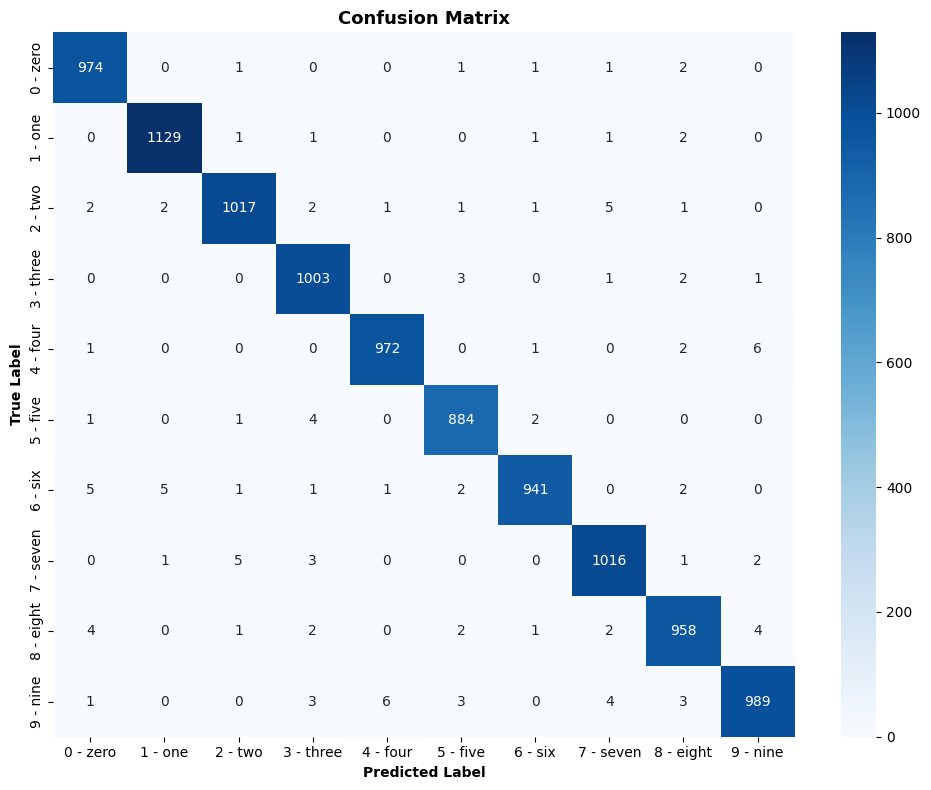

In [20]:
# CONFUSION MATRIX
model.eval()

y_pred = []
y_true = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)

        # Get the model's outputs (logits)
        output = model(data)

        # Get the predicted class (the one with the highest score)
        pred = output.argmax(dim=1, keepdim=True).cpu().numpy()
        y_pred.extend(pred.flatten()) # Adding predictions

        # Adding true labels
        y_true.extend(target.cpu().numpy().flatten())


# 1. Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=classes))

# some separation
print("-----------------------------------------------------------")

# 2. Confusion Matrix
print("\n\nConfusion Matrix:\n")
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label', fontweight='bold')
plt.ylabel('True Label', fontweight='bold')
plt.title('Confusion Matrix', fontsize = 13, fontweight="bold")
plt.tight_layout()
plt.show()

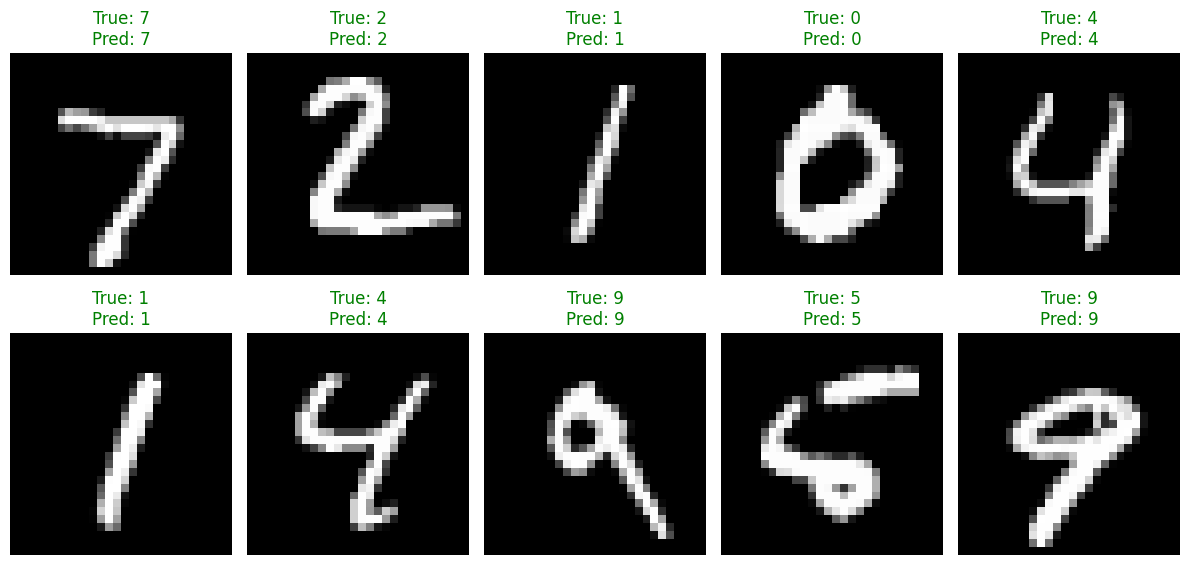

In [21]:
# Check model performances on random examples

model.eval()
with torch.no_grad():
    # test batch
    data_iter = iter(test_loader)
    images, labels = next(data_iter)
    images, labels = images.to(device), labels.to(device)

    # Predictions of first 10 images
    outputs = model(images[:10])
    _, predicted = torch.max(outputs, 1)

    # Showing results
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    for i in range(10):
        ax = axes[i//5, i%5]
        # Denormalization for viewing purposes: from [-1,1] to [0,1]
        img = images[i].cpu().squeeze() * 0.5 + 0.5
        ax.imshow(img, cmap='gray')
        color = "green" if predicted[i].item() == labels[i].item() else "red"
        ax.set_title(f'True: {labels[i].item()}\nPred: {predicted[i].item()}', color = color)
        ax.axis('off')

    plt.tight_layout()
    plt.show()


# Phase 2: XAI analysis
In this phase, we will examine XAI techniques, progressing from the simplest to the most sophisticated.
For every technique, we will discuss about pros and cons, especially in our use case.

first, let's define some utility functions that we'll call during most of XAI techniques analysis

In [22]:
# 1. Function for image preprocessing
def preprocess_image_for_xai(image_tensor):
    """
    Preprocesses a single image tensor for XAI techniques and visualization.

    Args:
        image_tensor (torch.Tensor): The input image tensor (shape [1, 28, 28] or [28, 28]).

    Returns:
        tuple: A tuple containing:
            - img_tensor_unsqueezed (torch.Tensor): Image tensor unsqueezed for model input ([1, 1, 28, 28]).
            - orig_img_np (np.ndarray): Original image as a numpy array for display (denormalized, [28, 28]).
            - image_rgb_uint8 (np.ndarray): Original image as a uint8 RGB numpy array ([28, 28, 3]).
    """
    # Ensure tensor has a batch dimension
    if image_tensor.ndim == 3:
        img_tensor_unsqueezed = image_tensor.unsqueeze(0)
    elif image_tensor.ndim == 2:
        img_tensor_unsqueezed = image_tensor.unsqueeze(0).unsqueeze(0)
    else:
        img_tensor_unsqueezed = image_tensor # correct shape [1, 1, 28, 28]

    # Denormalize for visualization: from [-1,1] to [0,1]
    orig_img_np = img_tensor_unsqueezed.squeeze().cpu().detach().numpy() * 0.5 + 0.5

    # Convert to RGB uint8
    image_rgb = gray2rgb(orig_img_np)
    image_rgb_uint8 = (image_rgb * 255).astype(np.uint8)

    return img_tensor_unsqueezed, orig_img_np, image_rgb_uint8


# 2. Function for getting model predictions
def get_model_prediction(model, image_tensor):
    """
    Gets the model prediction for a single image tensor.

    Args:
        model (torch.nn.Module): The PyTorch model.
        image_tensor (torch.Tensor): The input image tensor with batch dimension ([1, 1, 28, 28]).

    Returns:
        tuple: A tuple containing:
            - predicted_class (int): The predicted class index.
            - confidence (float): The confidence score for the predicted class.
            - output (torch.Tensor): The raw model output (logits).
    """
    model.eval()
    device = next(model.parameters()).device
    image_tensor = image_tensor.to(device)

    with torch.no_grad():
        output = model(image_tensor)
        predicted_class = output.argmax(dim=1).item()
        confidence = F.softmax(output, dim=1)[0, predicted_class].item()

    return predicted_class, confidence, output


# 3. Visualization function
def display_xai_explanation(original_image_np, attribution_map, true_label, predicted_class, technique_title,
                             cmap='hot', overlay_alpha=0.5, show_colorbar=True, filter_percentile=None,
                             use_divergent=False):
    """
    Displays the original image, the attribution map, and their overlay.

    Args:
        original_image_np (np.ndarray): The original image numpy array (denormalized, [28, 28]).
        attribution_map (np.ndarray): The saliency/attribution map ([28, 28]).
        true_label (int): The true class label.
        predicted_class (int): The predicted class label.
        technique_title (str): Name of the XAI technique.
        cmap (str, optional): Colormap for the attribution map. Defaults to 'hot'.
        overlay_alpha (float, optional): Transparency for the overlay. Defaults to 0.5.
        show_colorbar (bool, optional): Whether to display a colorbar. Defaults to True.
        filter_percentile (float, optional): If provided, filters the attribution map
                                             to show only values above this percentile (0-100), for cleaner visualizations.
        use_divergent (bool, optional): If True, preserves positive and negative values for divergent colormaps.
                                       If False, uses absolute values (default behavior). Defaults to False.
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Handle divergent vs non-divergent visualization
    if use_divergent:
        # For divergent colormaps (like RdBu_r), preserve positive and negative values
        if filter_percentile is not None:
            # For filtering with divergent maps, use absolute value for thresholding but preserve signs
            abs_map = np.abs(attribution_map)
            threshold = np.percentile(abs_map, filter_percentile)
            important_mask = abs_map > threshold
            display_map = np.zeros_like(attribution_map)
            if important_mask.any():
                # Keep original signs but normalize the important values
                important_abs_values = abs_map[important_mask]
                scale_factor = (important_abs_values - threshold) / (important_abs_values.max() - threshold + 1e-8)
                display_map[important_mask] = np.sign(attribution_map[important_mask]) * scale_factor
        else:
            # Use original values, ensuring symmetric range around zero
            display_map = attribution_map.copy()

        # Set symmetric color limits for divergent colormap
        abs_max = max(abs(display_map.min()), abs(display_map.max()))
        vmin, vmax = -abs_max, abs_max

    else:
        # Original behavior for non-divergent techniques (Grad-CAM, etc.)
        if filter_percentile is not None:
            abs_map = np.abs(attribution_map)
            threshold = np.percentile(abs_map, filter_percentile)
            important_mask = abs_map > threshold
            cleaned_map = np.zeros_like(abs_map)
            if important_mask.any():
                # Normalize the important values between 0 and 1 for better visualization
                important_values = abs_map[important_mask]
                cleaned_map[important_mask] = (important_values - threshold) / (important_values.max() - threshold + 1e-8)
            display_map = cleaned_map
        else:
            # Normalize the raw map for consistent color scaling
            abs_map = np.abs(attribution_map)
            if abs_map.max() > abs_map.min():
                display_map = (abs_map - abs_map.min()) / (abs_map.max() - abs_map.min())
            else:
                display_map = abs_map

        # Use natural min/max for non-divergent colormaps
        vmin, vmax = display_map.min(), display_map.max()

    # 1. Original Image
    color = "green" if predicted_class == true_label else "red"
    axes[0].imshow(original_image_np, cmap='gray')
    axes[0].set_title(f'Original Image\nTrue: {true_label}, Pred: {predicted_class}', color=color)
    axes[0].axis('off')

    # 2. Saliency/Attribution Map
    im = axes[1].imshow(display_map, cmap=cmap, vmin=vmin, vmax=vmax, interpolation='nearest')
    axes[1].set_title(f'{technique_title} Map')
    axes[1].axis('off')
    if show_colorbar:
        fig.colorbar(im, ax=axes[1])

    # 3. Overlay
    axes[2].imshow(original_image_np, cmap='gray')
    im_overlay = axes[2].imshow(display_map, cmap=cmap, vmin=vmin, vmax=vmax, alpha=overlay_alpha, interpolation='nearest')
    axes[2].set_title(f'{technique_title} Overlay')
    axes[2].axis('off')
    if show_colorbar:
        fig.colorbar(im_overlay, ax=axes[2])

    plt.suptitle(f'Explanation with {technique_title}', fontsize=16)
    plt.tight_layout()
    plt.show()


# 4. Function to pick random images from a dataloader
def pick_random_images_from_loader(dataloader, num_images):
    """
    Picks random images and labels from a DataLoader.

    Args:
        dataloader (torch.utils.data.DataLoader): The DataLoader.
        num_images (int): Number of images to pick.

    Returns:
        tuple: A tuple containing:
            - images (torch.Tensor): Stacked image tensors.
            - labels (torch.Tensor): Stacked label tensors.
    """
    all_imgs, all_labs = [], []
    for images, labels in dataloader:
        all_imgs.append(images)
        all_labs.append(labels)
        if len(all_imgs) * dataloader.batch_size >= num_images:
            break
    all_imgs = torch.cat(all_imgs, dim=0)
    all_labs = torch.cat(all_labs, dim=0)
    indices = random.sample(range(len(all_imgs)), k=min(num_images, len(all_imgs)))
    return all_imgs[indices], all_labs[indices]


## - LIME (Local Interpretable Model-agnostic Explanations)

Answer to the question:
- Which parts of this specific image were the most important for the model's prediction?

How does it work?
- It works by creating an "explainer", a simpler, interpretable model that approximates the complex model's behavior for a single prediction.

How it Works: The Core Idea

1. Segment the Image: First, it breaks the image into smaller, understandable pieces called "superpixels."

2. Create Perturbations: It then generates thousands of new, slightly different images by randomly hiding some of these superpixels.

3. Learn from Predictions: For each new image, it gets the original model's prediction. By observing how the prediction changes when certain superpixels are hidden, LIME learns which ones are most influential.

4. Finally, it trains a simple, interpretable model (like a linear regression) on these results. The weights of this simple model tell us which superpixels from the original image had the most positive (or negative) impact on the final prediction.

Pros:
- Model-Agnostic: It can explain any image classification model, regardless of its architecture. You don't need to know how the "black box" works.

- Human-Interpretable: The output is a visual heatmap, making it easy to see what the model "looked at."


Cons:
- Local Fidelity Only: The explanation is only valid for that one specific image. It doesn't explain the model's overall behavior.

- Explanation Instability: The result can vary depending on the segmentation algorithm used and the random nature of the perturbations.


---


The quality of a LIME explanation heavily depends on how the image is broken down into superpixels. A good segmentation helps LIME ask more meaningful questions. We will explore three common methods:

- Quickshift: Tends to create segments that follow the natural contours and shapes in the image.

- SLIC: Produces segments that are relatively uniform and compact, almost like a mosaic.

- Grid: The simplest method. It just divides the image into a uniform grid, which is often surprisingly effective for centered objects like MNIST digits.

  0%|          | 0/3000 [00:00<?, ?it/s]

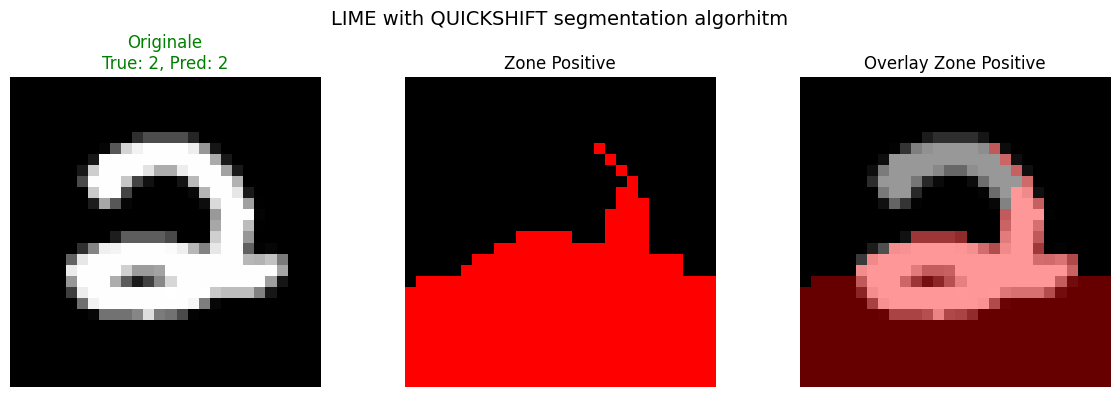

  0%|          | 0/3000 [00:00<?, ?it/s]

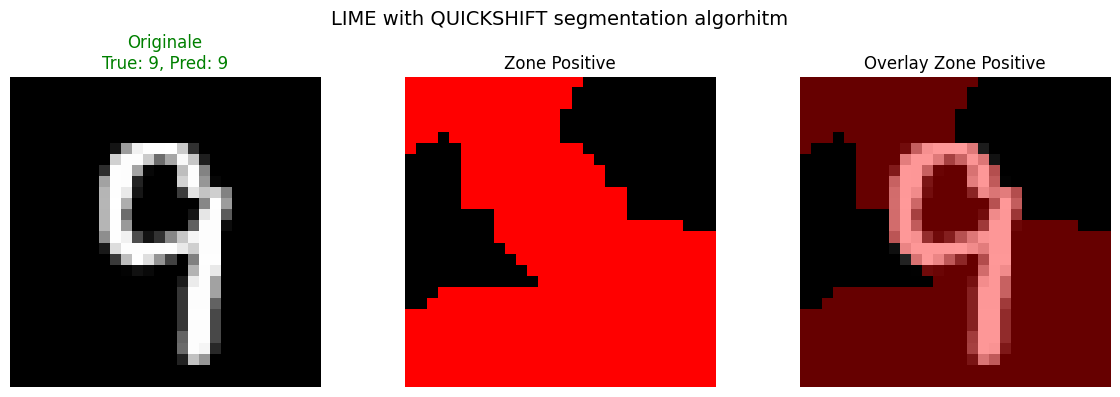

  0%|          | 0/3000 [00:00<?, ?it/s]

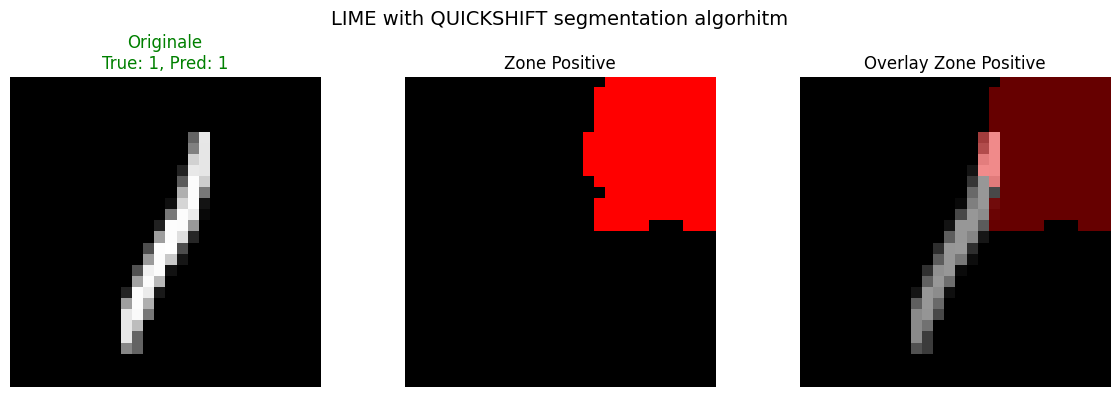

  0%|          | 0/3000 [00:00<?, ?it/s]

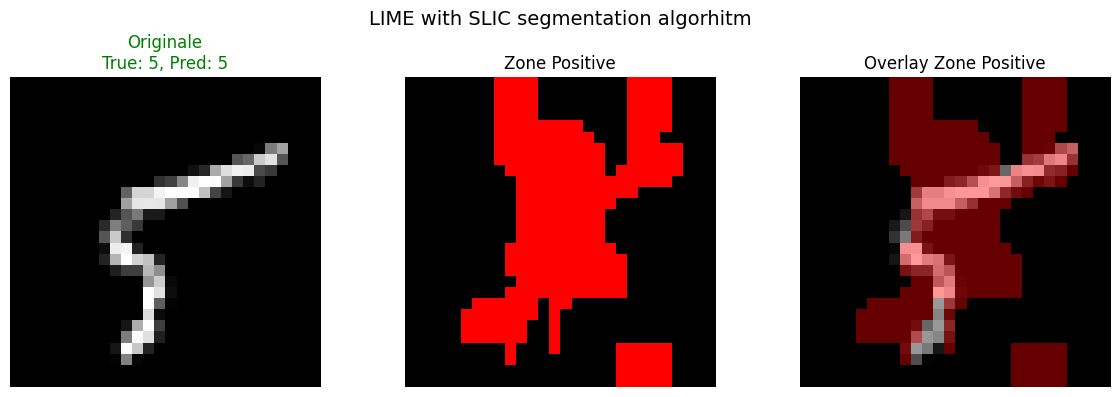

  0%|          | 0/3000 [00:00<?, ?it/s]

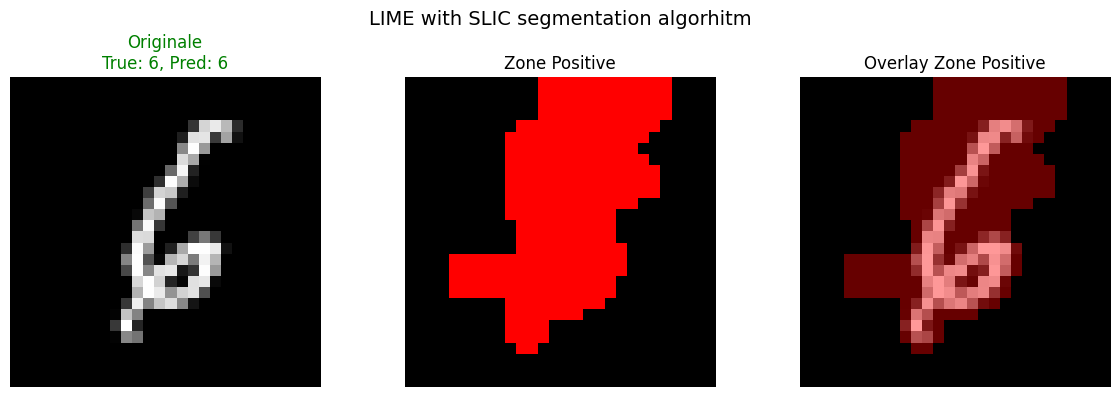

  0%|          | 0/3000 [00:00<?, ?it/s]

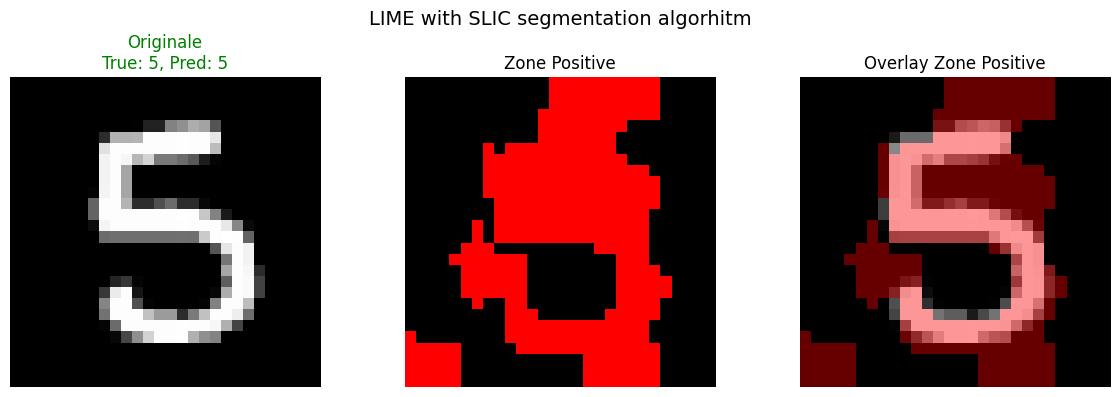

  0%|          | 0/3000 [00:00<?, ?it/s]

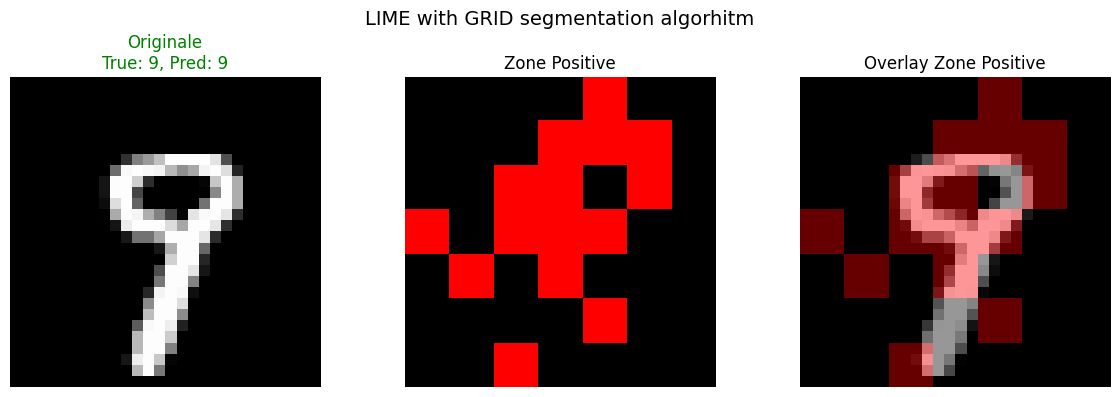

  0%|          | 0/3000 [00:00<?, ?it/s]

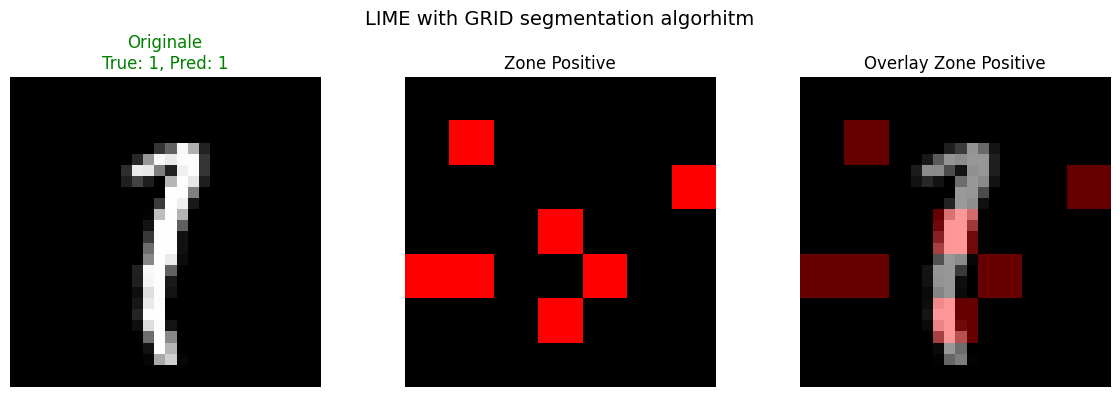

  0%|          | 0/3000 [00:00<?, ?it/s]

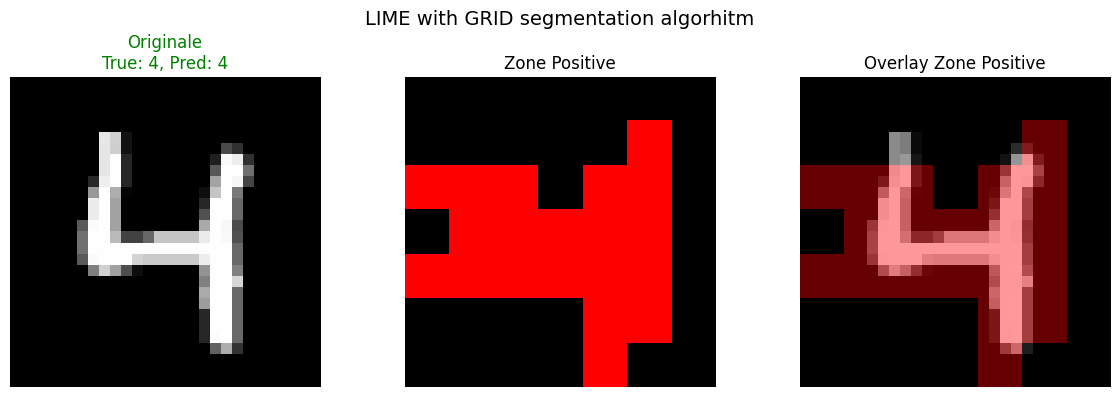

In [23]:
def make_lime_helpers(model, segmentation_method='quickshift', grid_size=7):
    """
    Creates helper functions needed for LIME analysis.

    Args:
        model (torch.nn.Module): The PyTorch model.
        segmentation_method (str, optional): Segmentation method for LIME. Defaults to 'quickshift'.
        grid_size (int, optional): Grid size, only for 'grid' segmentation. Defaults to 7.

    Returns:
        tuple: A tuple containing:
            - explainer: LIME explainer object.
            - classifier_fn: Wrapper for model predictions.
            - segmenter: Segmentation algorithm.
    """
    model = model.to(device)
    model.eval()

    explainer = lime_image.LimeImageExplainer(verbose=False)

    # Segmentation algorithm setup
    if segmentation_method == 'slic':
        segmenter = SegmentationAlgorithm('slic', n_segments=50, compactness=1, sigma=0.5)
    elif segmentation_method == 'grid':
        def grid_segmentation(image, grid_size=grid_size):
            h, w = image.shape[:2]
            segments = np.zeros((h, w), dtype=int)
            segment_id = 0
            step_h, step_w = h // grid_size, w // grid_size
            for i in range(0, h, step_h):
                for j in range(0, w, step_w):
                    end_i, end_j = min(i + step_h, h), min(j + step_w, w)
                    segments[i:end_i, j:end_j] = segment_id
                    segment_id += 1
            return segments
        segmenter = grid_segmentation
    else:  # 'quickshift' default
        segmenter = SegmentationAlgorithm('quickshift', kernel_size=1, max_dist=50, ratio=0.1)

    def classifier_fn(images_np):
        """
        Wrapper for model predictions.

        Args:
            images_np (np.ndarray): Input images as a numpy array.

        Returns:
            np.ndarray: Model predictions.
        """
        imgs_gray = images_np[..., 0].astype(np.float32) / 255.0
        imgs_norm = (imgs_gray - 0.5) / 0.5
        tensor = torch.from_numpy(imgs_norm).unsqueeze(1).to(device)

        with torch.no_grad():
            logits = model(tensor)
            probs = F.softmax(logits, dim=1).cpu().numpy()
        return probs

    return explainer, classifier_fn, segmenter


def get_lime_explanation(explainer, image_rgb_uint8, classifier_fn, segmenter,
                        predicted_class, num_features=15, min_weight=0.01,
                        num_samples=3000):
    """
    Generates LIME explanation for a single image.

    Args:
        explainer: LIME explainer object
        image_rgb_uint8: Image as a uint8 RGB numpy array
        classifier_fn: Wrapper for model predictions
        segmenter: Segmentation algorithm
        predicted_class: Predicted class
        num_features: Number of features for LIME
        min_weight: Min weight for LIME
        num_samples: Number of samples for LIME

    Returns:
        tuple: (explanation, temp, mask_pos)
    """

    explanation = explainer.explain_instance(
        image_rgb_uint8,
        classifier_fn=classifier_fn,
        top_labels=10,
        hide_color=0,
        num_samples=num_samples,
        segmentation_fn=segmenter
    )

    temp, mask_pos = explanation.get_image_and_mask(
        predicted_class,
        positive_only=True,
        num_features=num_features,
        hide_rest=False,
        min_weight=min_weight
    )

    return explanation, temp, mask_pos

# visualization function personalized for LIME because it produces a different output (binary mask with segments)

def visualize_lime_explanation(image_rgb_uint8, mask_pos, true_label,
                              pred_class, segmentation_method):
    """
    Show the original image, the mask, and the overlay.

    Args:
        image_rgb_uint8: Image as a uint8 RGB numpy array
        mask_pos: Binary mask with segments
        true_label: True label
        pred_class: Predicted class
        segmentation_method: Segmentation method (quickshift, slic or grid)

    """
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    # 1. Original image
    color = 'green' if true_label == pred_class else 'red'
    axes[0].imshow(image_rgb_uint8)
    axes[0].set_title(f'Originale\nTrue: {true_label}, Pred: {pred_class}', color=color)
    axes[0].axis('off')

    # 2. Positive zones
    axes[1].imshow(label2rgb(mask_pos, bg_label=0, colors=['red']))
    axes[1].set_title('Zone Positive')
    axes[1].axis('off')

    # 3. Overlay
    overlay = label2rgb(mask_pos, image_rgb_uint8, bg_label=0, alpha=0.4, colors=['red'])
    axes[2].imshow(overlay)
    axes[2].set_title('Overlay Zone Positive')
    axes[2].axis('off')

    plt.suptitle(f'LIME with {segmentation_method.upper()} segmentation algorhitm', fontsize=14)
    plt.tight_layout()
    plt.show()


def analyze_single_image_lime(model, img_tensor, true_label, explainer,
                             classifier_fn, segmenter, segmentation_method,
                             **lime_params):
    """
    Analysis of a single image with LIME.

    Args:
        model: PyTorch model
        img_tensor: Input image tensor
        true_label: True label
        explainer: LIME explainer object
        classifier_fn: Wrapper for model predictions
        segmenter: Segmentation algorithm
        segmentation_method: Segmentation method
        **lime_params: Additional parameters for LIME

    Returns:
        tuple: (explanation, mask)
    """
    # Preprocessing image
    img_tensor_unsqueezed, orig_img_np, image_rgb_uint8 = preprocess_image_for_xai(img_tensor)

    # Model prediction
    predicted_class, confidence, _ = get_model_prediction(model, img_tensor_unsqueezed)

    # LIME explanation
    explanation, temp, mask_pos = get_lime_explanation(
        explainer, image_rgb_uint8, classifier_fn, segmenter,
        predicted_class, **lime_params
    )

    # Visualization
    visualize_lime_explanation(image_rgb_uint8, mask_pos, true_label,
                              predicted_class, segmentation_method)

    return explanation, mask_pos


def analyze_images_with_lime(model, test_loader, num_images=3,
                           segmentation_method='quickshift', grid_size=7,
                           num_features=15, min_weight=0.01, num_samples=3000):
    """
    Main function to analyze images with LIME.

    Args:
        model: PyTorch model
        test_loader: DataLoader for test data
        num_images: Number of images to analyze
        segmentation_method: Segmentation method
        grid_size: Grid size for 'grid' segmentation
        num_features: Number of features for LIME
        min_weight: Min weight for LIME
        num_samples: Number of samples for LIME

    Returns:
        list: List of dictionaries containing explanations and masks.
    """
    # Setup helper LIME
    explainer, classifier_fn, segmenter = make_lime_helpers(
        model, segmentation_method=segmentation_method, grid_size=grid_size
    )

    # LIME parameters
    lime_params = {
        'num_features': num_features,
        'min_weight': min_weight,
        'num_samples': num_samples
    }

    # Random images
    imgs, labels = pick_random_images_from_loader(test_loader, num_images)

    results = []
    for i in range(len(imgs)):
        img_tensor = imgs[i]
        true_label = labels[i].item()

        explanation, mask = analyze_single_image_lime(
            model, img_tensor, true_label, explainer, classifier_fn,
            segmenter, segmentation_method, **lime_params
        )

        results.append({
            'explanation': explanation,
            'mask': mask,
            'true_label': true_label
        })

    return results


# Let's try all the three segmentation algorhitms
results_quickshift = analyze_images_with_lime(
    model, test_loader, num_images=3, segmentation_method='quickshift'
)

results_slic = analyze_images_with_lime(
    model, test_loader, num_images=3, segmentation_method='slic'
)

results_grid = analyze_images_with_lime(
    model, test_loader, num_images=3, segmentation_method='grid',
    grid_size=7, num_features=20
)

## - SHAP (SHapley Additive exPlanations)

Answer to the question:
- How much does each feature contribute to the difference between the model’s current prediction and its average prediction, according to cooperative game theory?

The key idea is inspired by the Shapley values from game theory: each feature is treated as a “player” in a coalition, and SHAP assigns an importance value ensuring fairness and symmetry. The result is an additive decomposition, where the sum of the feature attributions exactly matches the difference between the model prediction and the baseline (usually, the mean prediction).

Pros:
- Consistent, theoretically grounded attributions (Shapley values).

- Additive explanations: the sum of all feature effects explains the full prediction difference.

- Works for both linear and complex models.

Cons:
- Classic SHAP (KernelSHAP) is slow on complex datasets or images, as it considers many possible feature combinations.

- Standard implementations may not scale to large models or datasets.



Processing image 1/3 - True: 8, Predicted: 8


  0%|          | 0/1 [00:00<?, ?it/s]

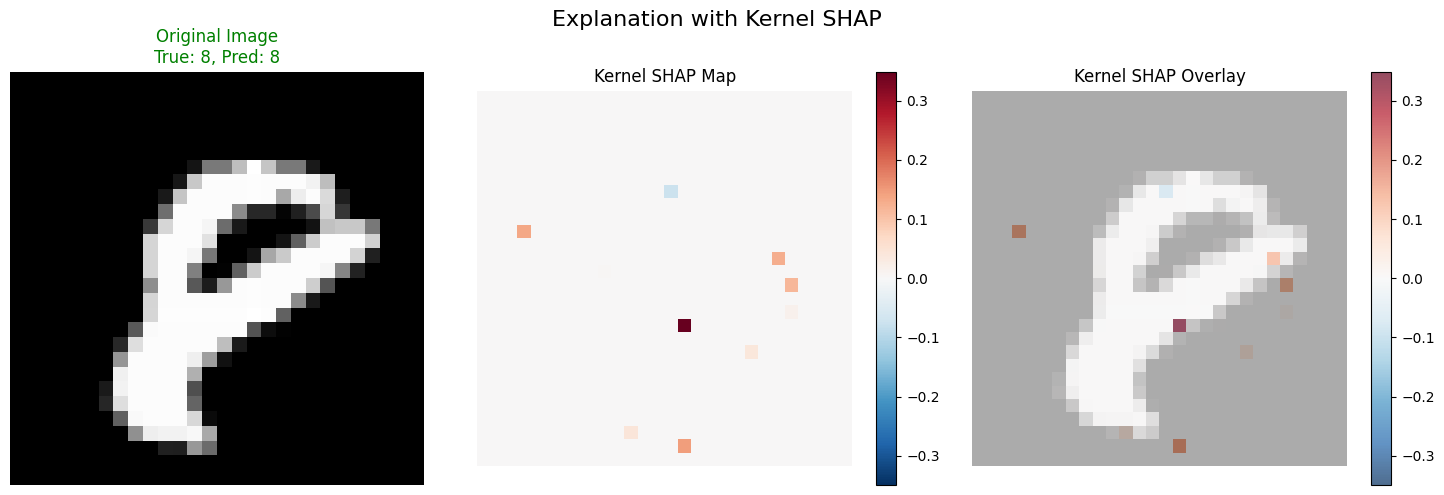

Processing image 2/3 - True: 2, Predicted: 2


  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/shap/explainers/_kernel.py:708: UserWarning: Linear regression equation is singular, a least squares solutions is used instead.
To avoid this situation and get a regular matrix do one of the following:
1) turn up the number of samples,
2) turn up the L1 regularization with num_features(N) where N is less than the number of samples,
3) group features together to reduce the number of inputs that need to be explained.
  warnings.warn(


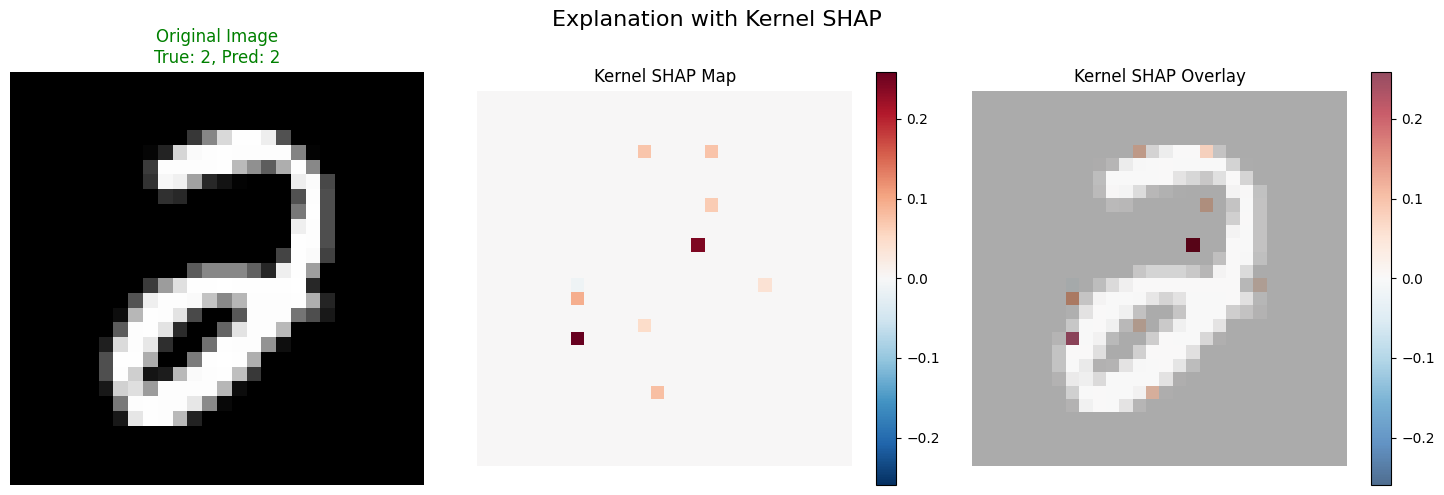

Processing image 3/3 - True: 6, Predicted: 6


  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.291e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.257e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.096e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2

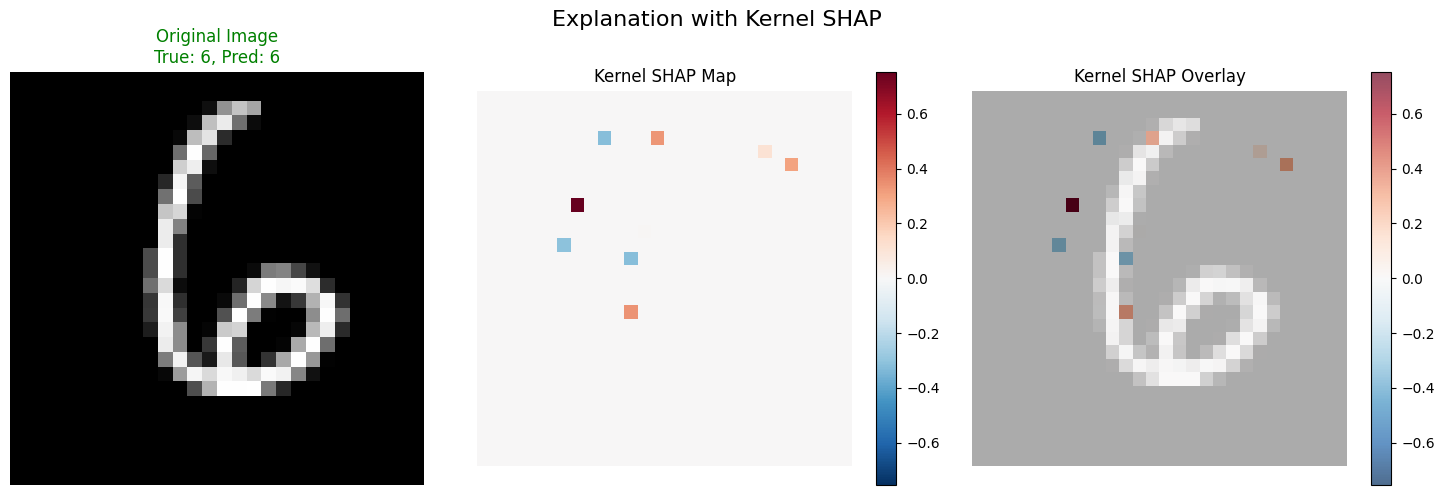

In [24]:
def shap_kernel_analysis(model, test_loader, n_samples=3, n_background=50, n_samples_shap=500, filter_percentile=None):
    """
    Function that uses SHAP Kernel analysis to explain model predictions.

    Args:
    - model: PyTorch model to explain.
    - test_loader: DataLoader for test data.
    - n_samples: Number of samples to analyze.
    - n_background: Number of background samples for SHAP.
    - n_samples_shap: Number of samples for SHAP explainer.
    - filter_percentile (float, optional): Percentile threshold for visualization filtering.
    """
    model.eval()
    model = model.to(device)

    # function to pick random images
    all_images, all_labels = pick_random_images_from_loader(test_loader, n_samples + n_background)

    # Separating test and background data
    test_images = all_images[:n_samples]
    test_labels = all_labels[:n_samples]
    background_images = all_images[n_samples:n_samples + n_background]

    # Preparing background data for SHAP (flattened numpy array)
    background_data_flat = background_images.cpu().numpy().reshape(n_background, -1)

    # Wrapper model for SHAP (expects flattened numpy input, returns probabilities)
    def shap_predict_fn(x_flat):
        """
        Predicts probabilities for input flattened numpy array.

        Args:
        - x_flat (np.ndarray): Flattened input data ([N, H*W]).

        Returns:
        - probabilities (np.ndarray): Predicted probabilities ([N, num_classes]).
        """
        # Reshape flattened input back to image tensor format [N, 1, H, W]
        x_tensor = torch.FloatTensor(x_flat).reshape(-1, 1, 28, 28).to(device)
        with torch.no_grad():
            outputs = model(x_tensor)
            probabilities = F.softmax(outputs, dim=1)
        return probabilities.cpu().numpy()

    # SHAP KernelExplainer
    explainer = shap.KernelExplainer(shap_predict_fn,
                                     background_data_flat,
                                     link="identity" # helps with stability
                                     )

    # Analyze each test image
    for i in range(n_samples):
        img_tensor = test_images[i]
        true_label = test_labels[i].item()

        # image preprocessing
        img_tensor_unsqueezed, orig_img_np, _ = preprocess_image_for_xai(img_tensor)

        # model prediction
        predicted_class, confidence, _ = get_model_prediction(model, img_tensor_unsqueezed)

        print(f"Processing image {i+1}/{n_samples} - True: {true_label}, Predicted: {predicted_class}")

        # Calculate SHAP values for the flattened image
        img_flat = img_tensor_unsqueezed.cpu().numpy().reshape(1, -1)

        shap_values = explainer.shap_values(img_flat,
                                            nsamples=n_samples_shap,
                                             l1_reg="num_features(10)" # regulatization improves stability
                                            )

        # Extract SHAP values for the predicted class and reshape back to 2D
        if isinstance(shap_values, list):
            # For multi-output models, shap_values is a list of arrays, one for each output
            shap_2d = shap_values[predicted_class][0].reshape(28, 28)
        else:
            # For single-output models, shap_values is a single array
            shap_2d = shap_values[0, :, predicted_class].reshape(28, 28)


        # Visualizing results
        # SHAP values can be positive or negative, used a diverging colormap like 'RdBu_r'
        display_xai_explanation(
            original_image_np=orig_img_np,
            attribution_map=shap_2d,
            true_label=true_label,
            predicted_class=predicted_class,
            technique_title='Kernel SHAP',
            cmap='RdBu_r',
            overlay_alpha=0.7,
            show_colorbar=True,
            filter_percentile=filter_percentile, # Pass filter setting
            use_divergent=True # preserves positive and negative values for divergent colormaps

        )



shap_results_kernel = shap_kernel_analysis(model, test_loader, n_samples=3, n_background=50, n_samples_shap=100)



## - GradientSHAP
GradientSHAP is a SHAP-inspired variant designed specifically for differentiable models like neural networks, it often gives more stable and faster results for image data.

How does it work?
GradientSHAP combines two main ideas:

SmoothGrad: Adds noise to the input and averages predictions/gradients, yielding less noisy and more robust attributions.

Integrated Gradients: Interpolates between a baseline (like a black or noisy image) and the actual image, computing gradients at steps along the path and summing them.

Effectively, for each sample, GradientSHAP generates many “noisy” versions of the input and computes the average gradient-based attributions along a path from the baseline to the actual image. This produces attributions that are more reliable than raw gradients, reducing noise and instability.

How is it different from classic SHAP?
GradientSHAP leverages automatic differentiation in deep learning models; classic SHAP (like KernelSHAP) is model-agnostic and works by sampling over feature subsets.

Performance: Much faster and more practical for neural networks, as it avoids the combinatorial explosion of subsets.

Baseline Sampling: GradientSHAP depends on picking a baseline and sampling from noise, unlike classic SHAP, which considers all feature combinations.

**Pros :)**
- Fast and scalable for deep learning models.

- More stable attributions than simple (vanilla) gradients.

- Blends SHAP principles with Integrated Gradients and SmoothGrad.

- Built directly into Captum, so it's easy to use with PyTorch workflows.

**Cons :(**
- The choice of baseline can affect interpretation.

- Less purely “game theoretical” than KernelSHAP since it doesn't actually enumerate all feature subsets, but rather interpolates between baseline and input.

- Requires differentiable models. (like NNs)

- Noisy, as all the gradient methods

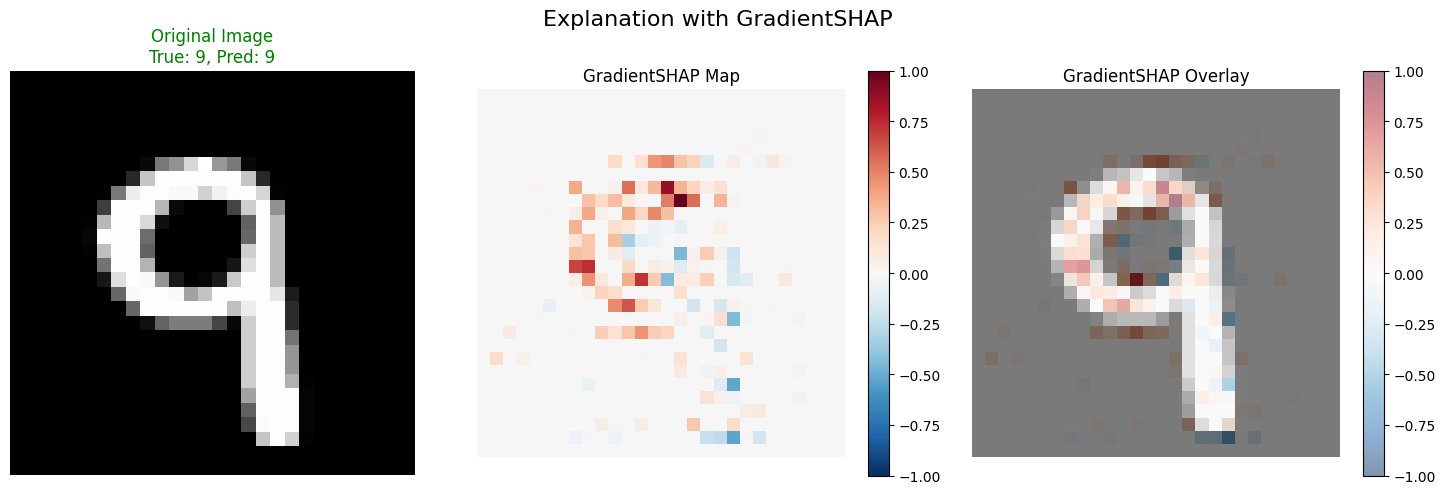

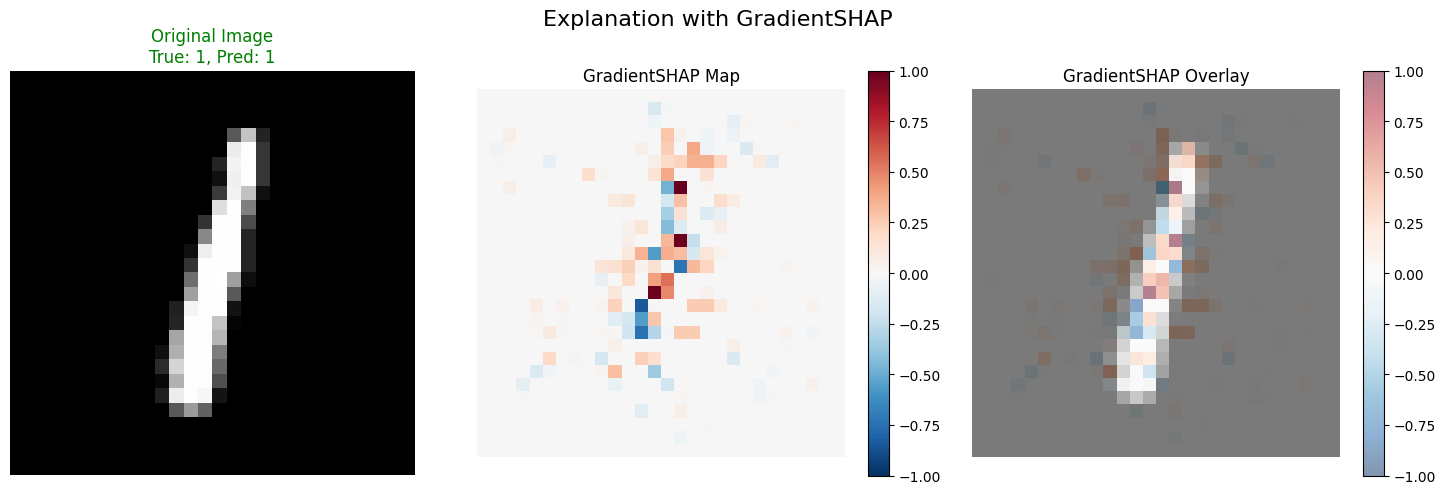

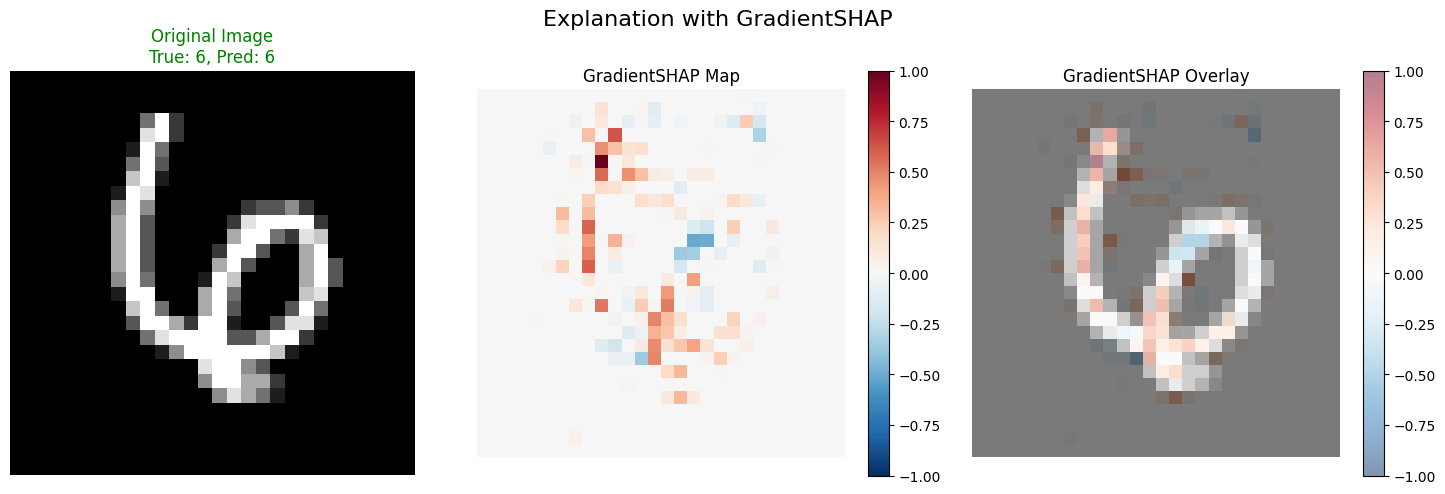

In [25]:
def captum_gradient_shap_analysis(model, test_loader, n_samples=3, n_baselines_gs=10, n_samples_gs=50, filter_percentile=None):
    """
    Uses GradientSHAP to explain model predictions.

    Args:
    - model: PyTorch model to explain.
    - test_loader: DataLoader for test data.
    - n_samples: Number of samples to analyze.
    - n_baselines_gs: Number of baselines for GradientSHAP.
    - n_samples_gs: Number of interpolation steps for GradientSHAP.
    - filter_percentile (float, optional): Percentile threshold for visualization filtering.
    """
    model.eval()
    model = model.to(device)

    # pick random images
    images, labels = pick_random_images_from_loader(test_loader, n_samples)

    # Setup GradientShap
    gradient_shap = GradientShap(model)

    # Prepare baselines
    baselines_gs = torch.randn_like(images[:n_baselines_gs]) * 0.1
    baselines_gs = baselines_gs.to(device) # Move baselines to device


    # Analyze each test image
    for i in range(n_samples):
        img_tensor = images[i]
        true_label = labels[i].item()

        # image preprocessing
        img_tensor_unsqueezed, orig_img_np, _ = preprocess_image_for_xai(img_tensor)
        img_tensor_unsqueezed = img_tensor_unsqueezed.to(device) # Move input tensor to the correct device


        # model prediction
        predicted_class, confidence, _ = get_model_prediction(model, img_tensor_unsqueezed)

        # Calculate GradientShap attribution
        attribution = gradient_shap.attribute(
            img_tensor_unsqueezed,
            baselines=baselines_gs[:min(n_baselines_gs, len(images))], # Use a subset of baselines if fewer images picked
            target=predicted_class,
            n_samples=n_samples_gs
        )

        # Visualize the results
        # GradientSHAP attributions can be positive or negative, so we use RdBu_r again
        display_xai_explanation(
            original_image_np=orig_img_np, # Use the preprocessed numpy image
            attribution_map=attribution.squeeze().cpu().detach().numpy(), # Use absolute values and ensure 2D numpy
            true_label=true_label,
            predicted_class=predicted_class,
            technique_title='GradientSHAP',
            cmap='RdBu_r',
            overlay_alpha=0.5,
            show_colorbar=True,
            filter_percentile=filter_percentile, # Pass filter setting
            use_divergent=True # preserves positive and negative values for divergent colormaps
        )



captum_gradient_shap_analysis(model, test_loader, n_samples=3, filter_percentile=80)

## Saliency maps
**question to answer:** Which are the most important parts of an image for the inference?

**Pros :)**
- Computational Efficiency: Extremely fast to compute

- Implementation Simplicity

- Universal Applicability: Works with any neural network architecture without modification

- Very Precise


**Cons :(**

- High Noise: Produces visually noisy maps due to irrelevant features passing through ReLU activations

- Sensitivity to Perturbations: Small input changes can dramatically alter saliency maps, indicating poor robustness

- Class Similarity Problem: Often produces similar-looking maps across different classes, especially on simple tasks

- Limited Interpretability: Provides a narrow view of decision-making that may not reflect the model's actual reasoning process

- Background Feature Interference: Highlights irrelevant background regions that don't contribute to the classification decision



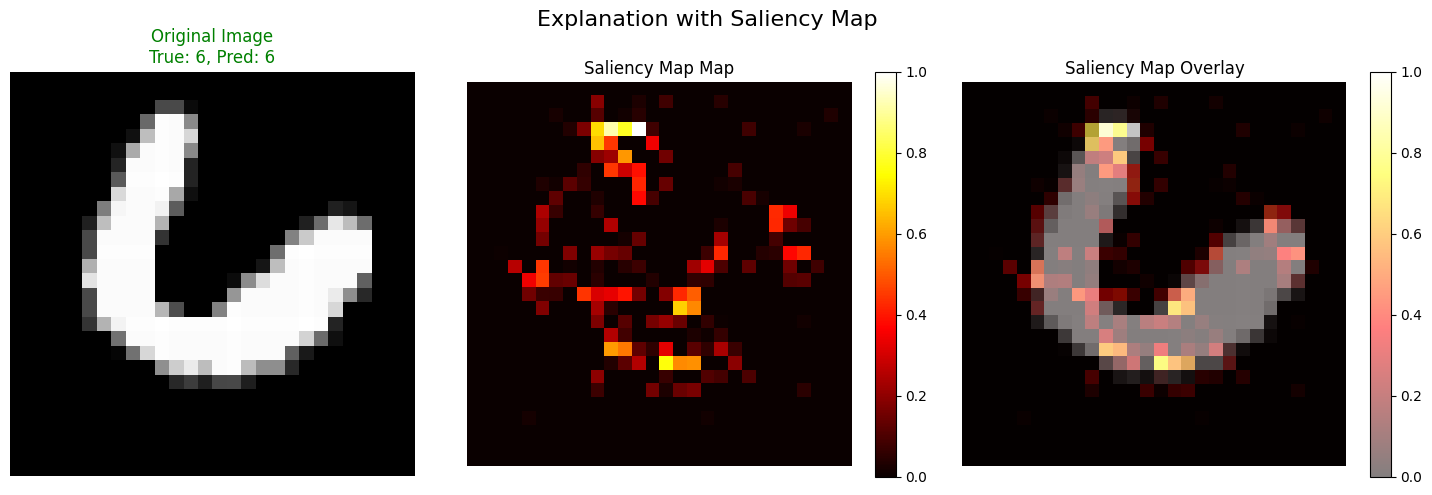

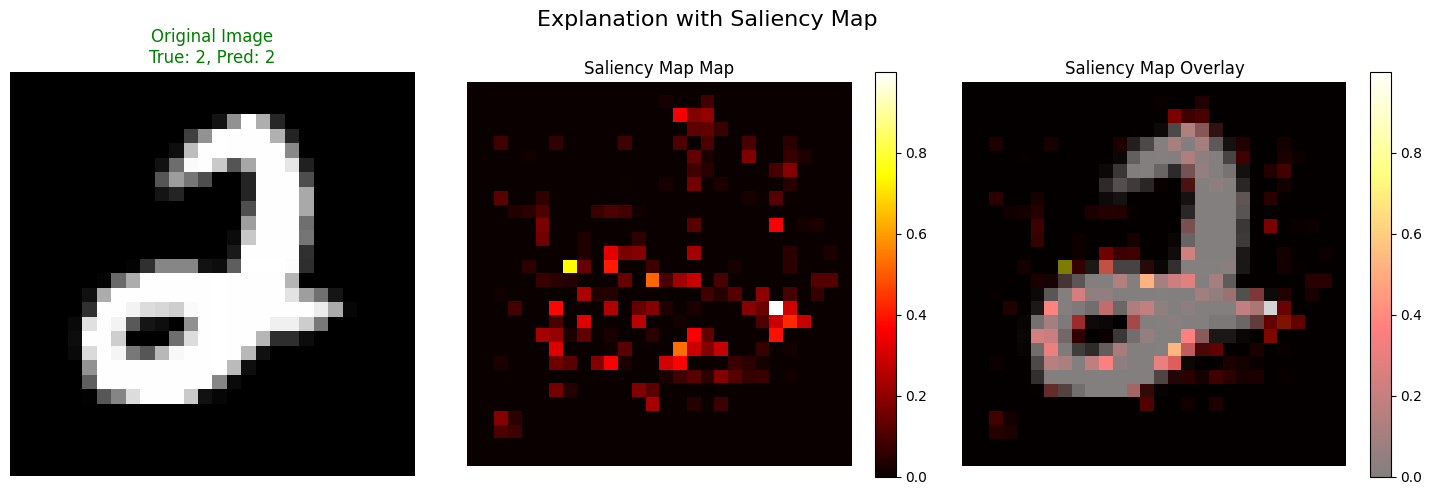

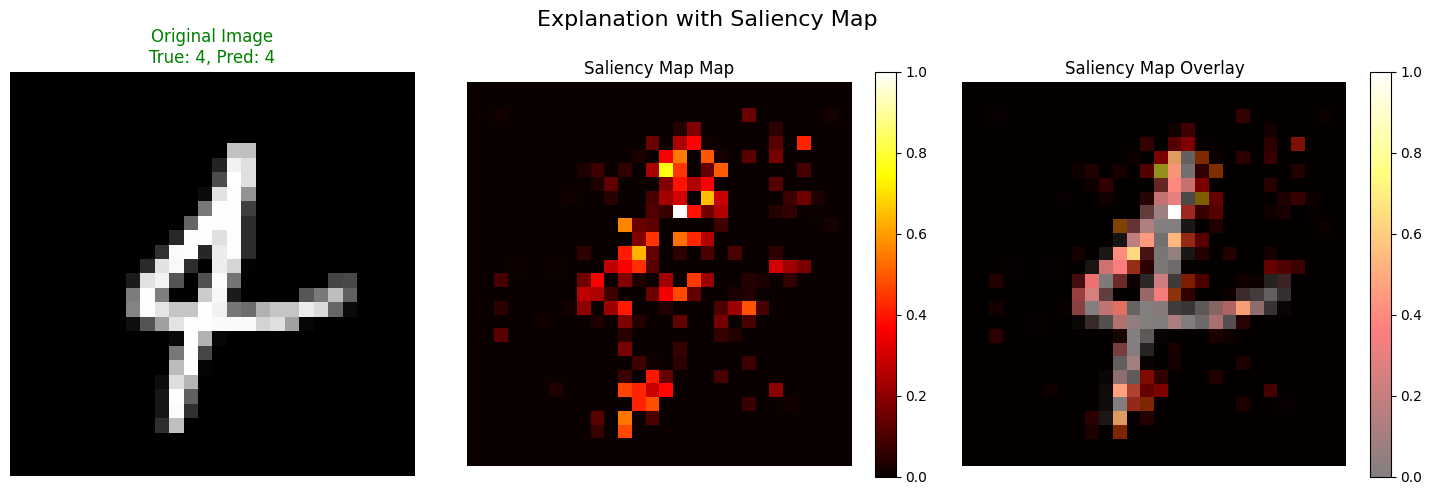

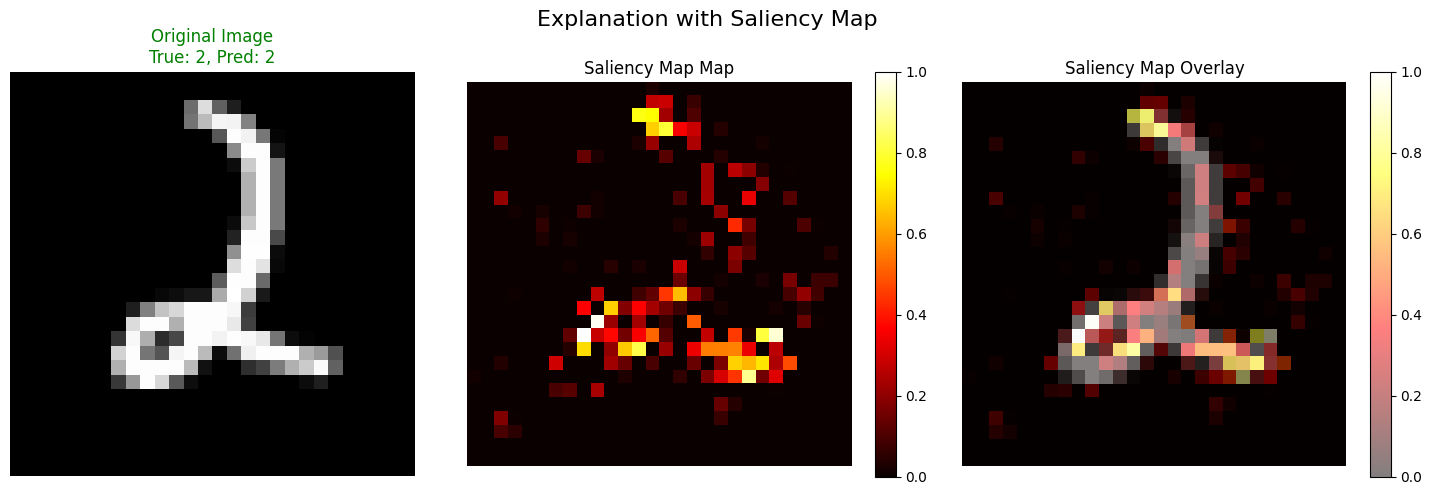

In [26]:
def visualize_batch_saliency(model, test_loader, n_samples=4, filter_percentile=None):
    """
    Visualize saliency maps.

    Args:
        model: Pytorch model
        test_loader: DataLoader for test data
        n_samples: Number of samples to visualize
        filter_percentile (float, optional): Percentile threshold for visualization filtering.
    """
    model.eval()
    device = next(model.parameters()).device
    model = model.to(device)

    # Use reusable function to pick random images from test loader
    images, labels = pick_random_images_from_loader(test_loader, n_samples)

    # Setup Saliency
    saliency = Saliency(model)

    # Analyze each selected image
    for i in range(min(n_samples, len(images))):
        img_tensor = images[i]
        true_label = labels[i].item() # Convert label tensor to int

        # Image preprocessing
        img_tensor_unsqueezed, orig_img_np, _ = preprocess_image_for_xai(img_tensor)
        input_img = img_tensor_unsqueezed.requires_grad_(True).to(device) # Move input tensor to the correct device


        # Model prediction
        predicted_class, confidence, _ = get_model_prediction(model, input_img) # Use input_img with grad enabled


        # Calculate Saliency attribution
        saliency_attr = saliency.attribute(input_img, target=predicted_class)

        # Visualize the results

        display_xai_explanation(
            original_image_np=orig_img_np, # Use the preprocessed numpy image
            attribution_map=saliency_attr.abs().squeeze().cpu().detach().numpy(), # Use absolute values and ensure 2D numpy
            true_label=true_label,
            predicted_class=predicted_class,
            technique_title='Saliency Map',
            cmap='hot',
            overlay_alpha=0.5,
            show_colorbar=True,
            filter_percentile=filter_percentile, # Pass filter setting
            use_divergent=False # Saliency map is tipically positive
        )



visualize_batch_saliency(model, test_loader, n_samples=4, filter_percentile=80)

## - Integrated Gradients
idea: overlap the gradients, retrieve saliency doing different gradients overlapping, summed they reduced the overall noise

Pros:   
- It works on any type of model

Cons:
- random background choice, different path with different backgrounds
- not as much noisy as saliency map but still too noisy




Processing image 1/4 - True: 1, Predicted: 1


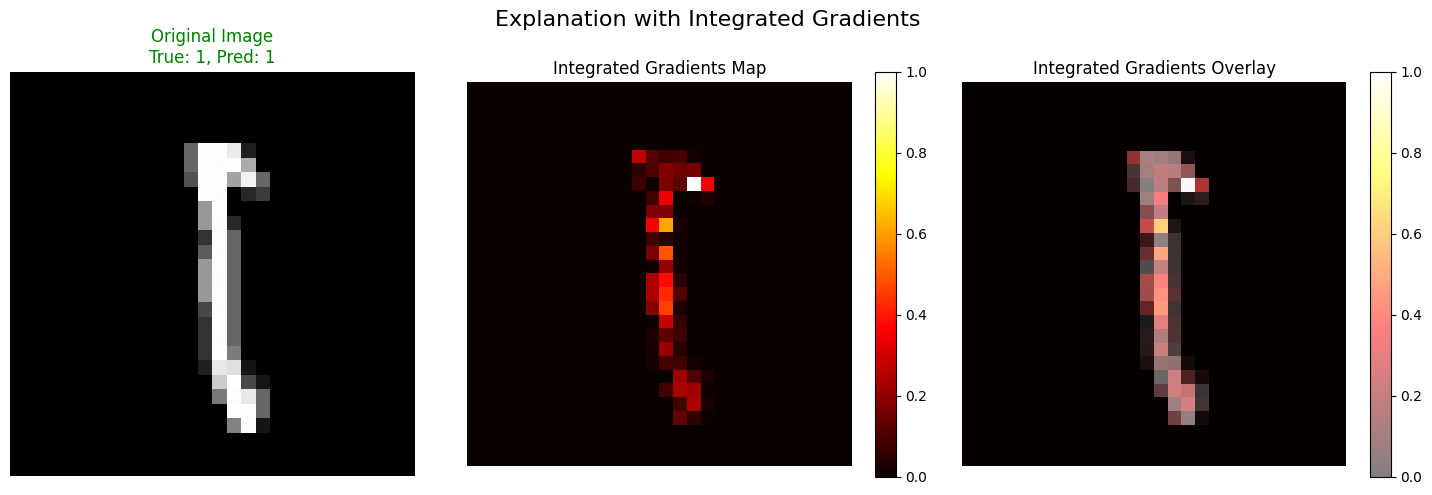

Processing image 2/4 - True: 2, Predicted: 2


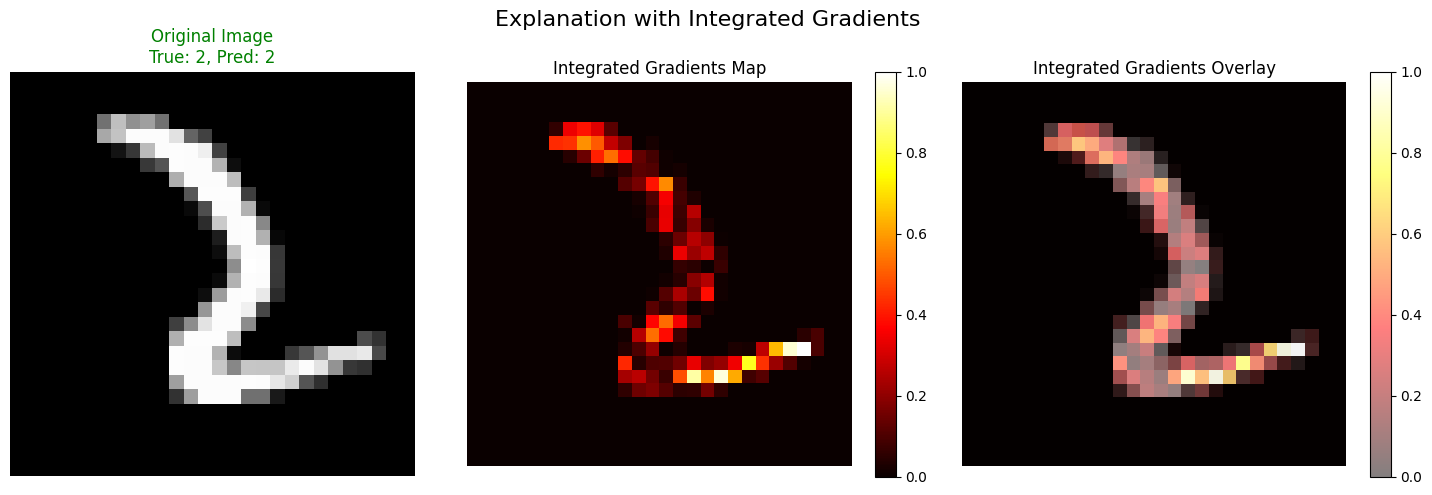

Processing image 3/4 - True: 1, Predicted: 1


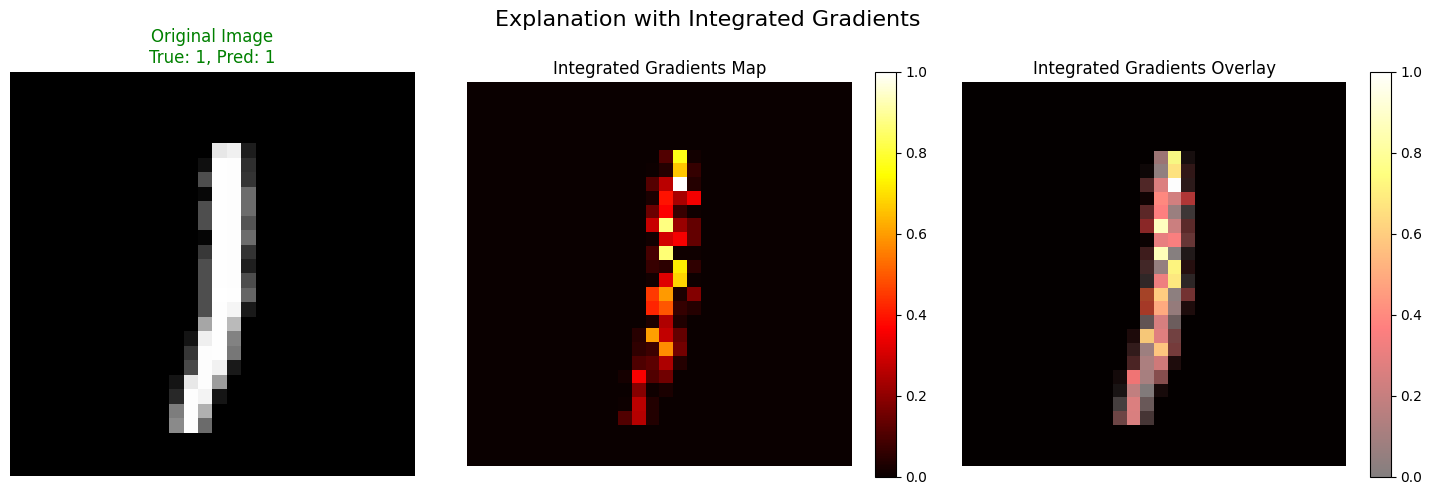

Processing image 4/4 - True: 8, Predicted: 8


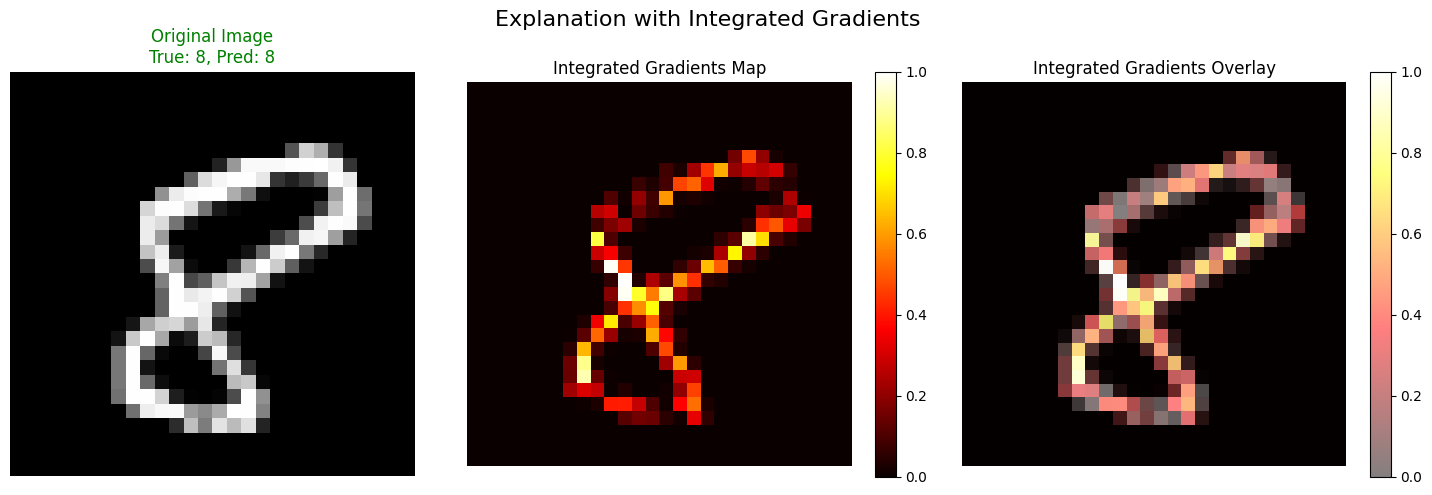

In [27]:
def visualize_integrated_gradients_examples(model, test_loader, n_samples=4, n_steps=50, filter_percentile=None):
    """
    Function that uses Integrated Gradients to explain model predictions.

    Args:
        model: PyTorch model to explain.
        test_loader: DataLoader for test data.
        n_samples: Number of samples to analyze.
        n_steps: Number of interpolation steps for Integrated Gradients.
        filter_percentile (float, optional): Percentile threshold for visualization filtering.
    """

    model.eval()
    device = next(model.parameters()).device
    model = model.to(device)

    # pick random images
    images, labels = pick_random_images_from_loader(test_loader, n_samples)

    # Integrated Gradients initialization
    ig = IntegratedGradients(model)

    # Analyze each selected image
    for i in range(min(n_samples, len(images))):
        img_tensor = images[i]
        true_label = labels[i].item() # Convert label tensor to int

        # image preprocessing
        img_tensor_unsqueezed, orig_img_np, _ = preprocess_image_for_xai(img_tensor)
        img_tensor_unsqueezed = img_tensor_unsqueezed.to(device) # Move input tensor to the correct device

        # model prediction
        predicted_class, confidence, _ = get_model_prediction(model, img_tensor_unsqueezed)

        print(f"Processing image {i+1}/{n_samples} - True: {true_label}, Predicted: {predicted_class}")

        # Calculate Integrated Gradients attribution
        # Using a black image as baseline (-1.0 after normalization)
        baseline = torch.zeros_like(img_tensor_unsqueezed).to(device) - 1.0
        ig_attr = ig.attribute(
            img_tensor_unsqueezed,
            baselines=baseline,
            target=predicted_class,
            n_steps=n_steps
        )

        # visualize the results
        display_xai_explanation(
            original_image_np=orig_img_np, # Use the preprocessed numpy image
            attribution_map=ig_attr.abs().squeeze().cpu().detach().numpy(), # Use absolute values and ensure 2D numpy
            true_label=true_label,
            predicted_class=predicted_class,
            technique_title='Integrated Gradients',
            cmap='hot', # if use_divergent = True, it's better to use "RdBu_r"
            overlay_alpha=0.5,
            show_colorbar=True,
            filter_percentile=filter_percentile, # Pass filter setting
            use_divergent=False # IG attributions can be positive or negative, but abs is often used for visualization, so we keep only positive (if changed to True, it's better to change also the cmap)
        )



visualize_integrated_gradients_examples(model, test_loader, n_samples=4, filter_percentile=None)

## - Occlusion maps

**question to answer:** How much "damage" to model performance I do if I cover this image specific region?


**Pros :)**  

- Model-Agnostic: Works with any model architecture

- Robust Results: It makes model learning more robust (resolving possible dependencies from some pixels)-> good augmentation method

- Clean Visualizations

**Cons :(**

- Slow: model called for every image part I'm considering


Processing image 1/4 - True: 7, Predicted: 7


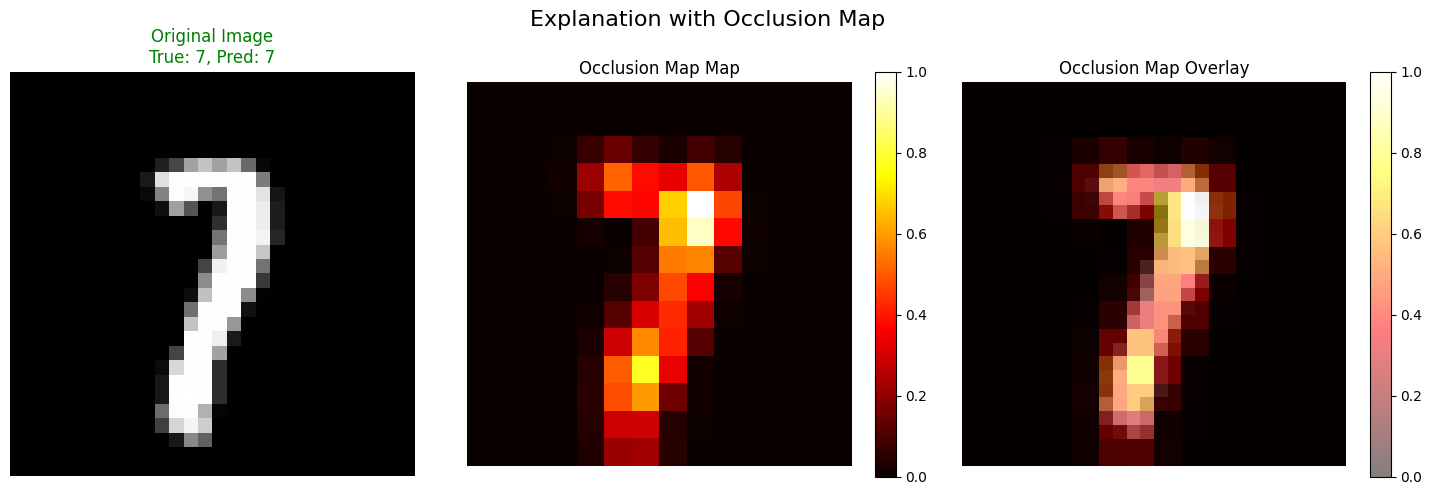

Processing image 2/4 - True: 1, Predicted: 1


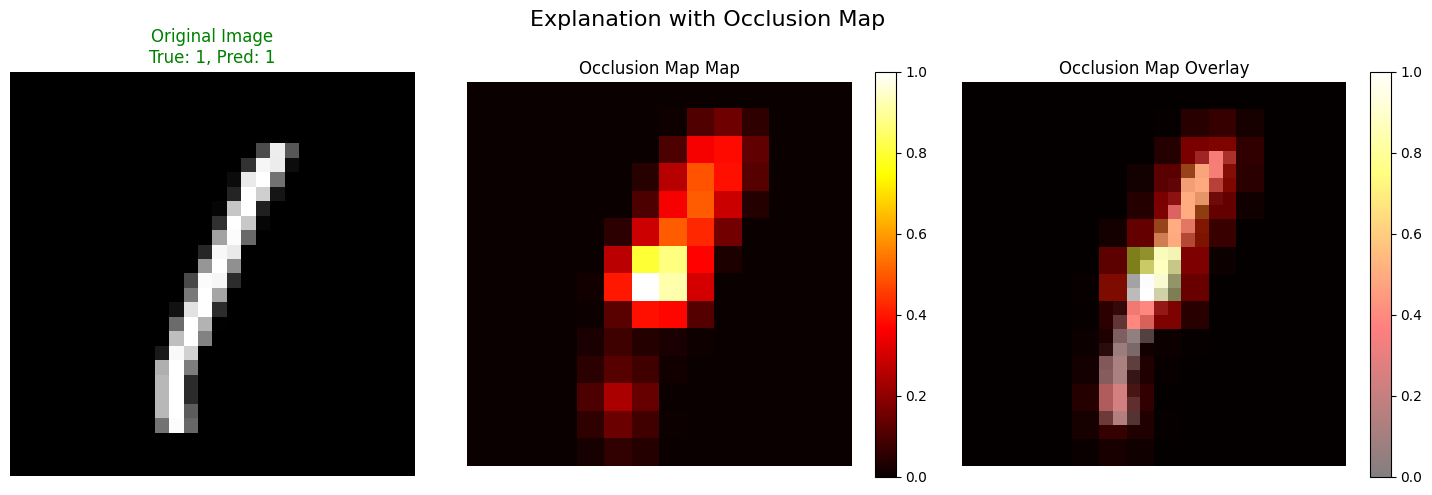

Processing image 3/4 - True: 4, Predicted: 4


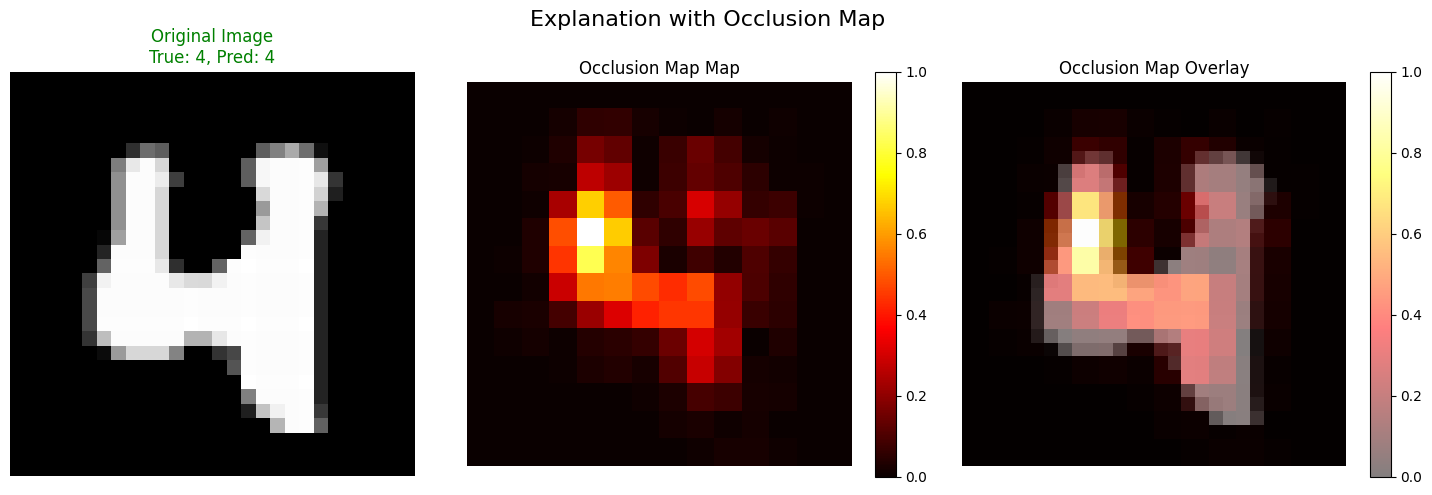

Processing image 4/4 - True: 7, Predicted: 7


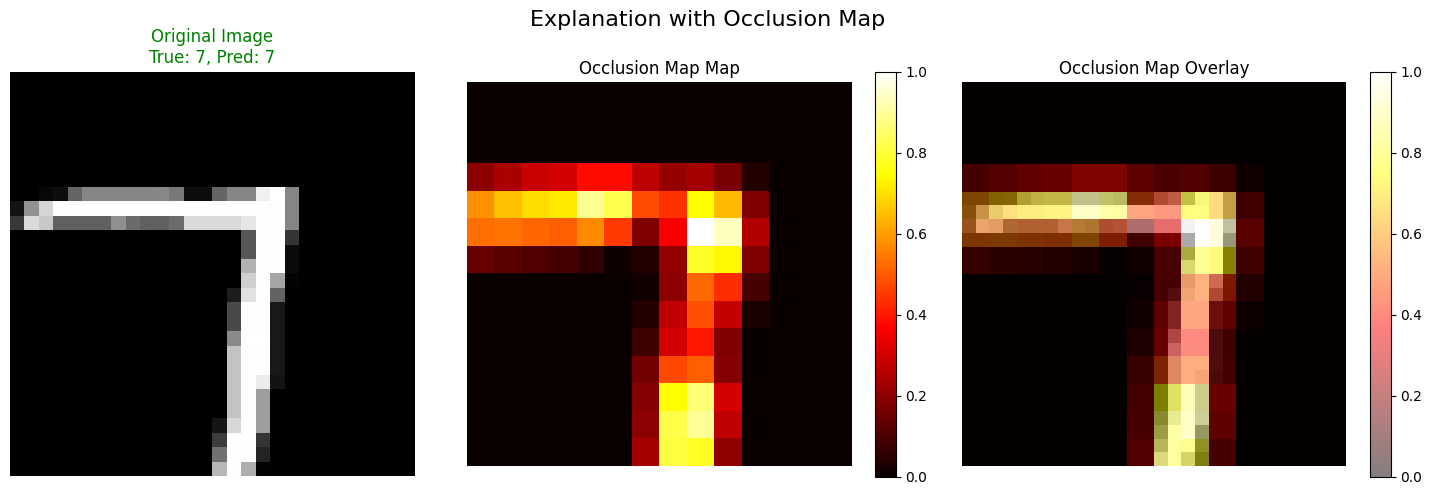

In [28]:
def visualize_batch_occlusion(model, test_loader, n_samples=4, strides=(1, 2, 2), window_shape=(1, 4, 4), filter_percentile=None):
    """
    Function that uses Occlusion to explain model predictions.

    Args:
        model: PyTorch model to explain.
        test_loader: DataLoader for test data.
        n_samples: Number of samples to analyze.
        strides (tuple): Step size for the sliding window (depth, height, width).
        window_shape (tuple): Shape of the sliding window (depth, height, width).
        filter_percentile (float, optional): Percentile threshold for visualization filtering.
    """

    model.eval()
    device = next(model.parameters()).device
    model = model.to(device)

    # Use reusable function to pick random images
    images, labels = pick_random_images_from_loader(test_loader, n_samples)

    # Occlusion initialization
    occlusion = Occlusion(model)

    # Analyze each selected image
    for i in range(min(n_samples, len(images))):
        img_tensor = images[i]
        true_label = labels[i].item() # Convert label tensor to int

        # Use reusable function for image preprocessing
        img_tensor_unsqueezed, orig_img_np, _ = preprocess_image_for_xai(img_tensor)
        img_tensor_unsqueezed = img_tensor_unsqueezed.to(device) # Move input tensor to the correct device

        # Use reusable function for model prediction
        predicted_class, confidence, _ = get_model_prediction(model, img_tensor_unsqueezed)

        print(f"Processing image {i+1}/{n_samples} - True: {true_label}, Predicted: {predicted_class}")

        # Calculate Occlusion attribution
        occlusion_attr = occlusion.attribute(
            img_tensor_unsqueezed, # Use the preprocessed tensor
            target=predicted_class,
            strides=strides,
            sliding_window_shapes=window_shape,
            baselines=-1.0 # Use black as baseline
        )

        # Use the reusable display function to visualize the results
        display_xai_explanation(
            original_image_np=orig_img_np, # Use the preprocessed numpy image
            attribution_map=occlusion_attr.abs().squeeze().cpu().detach().numpy(), # Use absolute values and ensure 2D numpy
            true_label=true_label,
            predicted_class=predicted_class,
            technique_title='Occlusion Map',
            cmap='hot',
            overlay_alpha=0.5,
            show_colorbar=True,
            filter_percentile=filter_percentile, # Pass filter setting
            use_divergent=False # Occlusion map is typically positive
        )


# Test the refactored function
visualize_batch_occlusion(model, test_loader, n_samples=4, filter_percentile=None)

## - GRAD-CAM
Baseline of XAI models in CV

Grad-CAM answers the question: "Which regions of the convolutional feature maps contribute the most to the prediction for a specific class?"

Concept: It uses the gradients of the target class with respect to the feature maps of the last convolutional layer to produce a localization map that highlights the important regions in the image.

It starts from the concept of CAM (taking the output from the last convolutional filter and training a linear model) and, instead of training a new model (training data isn't always available), it finds the coefficients through backpropagation from the fully connected layers.

pros:
- works really well

cons:
- Detail problem (I would need higher resolution for finer visualizations).

- It only works with neural networks

Processing image 1/3 - True: 4, Predicted: 4


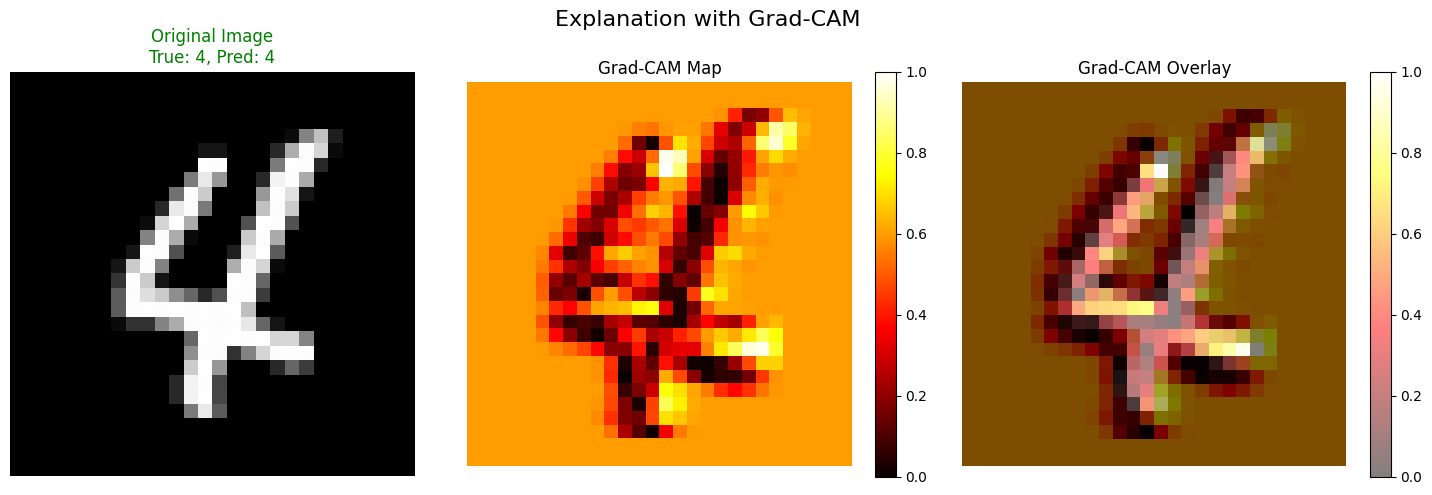

Processing image 2/3 - True: 2, Predicted: 2


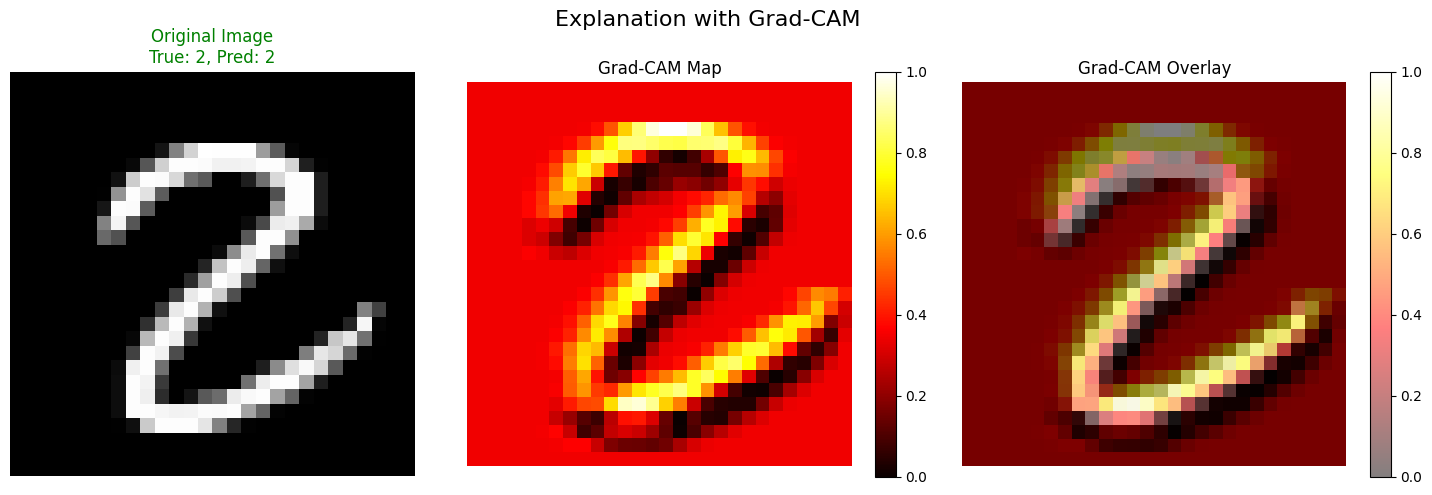

Processing image 3/3 - True: 8, Predicted: 8


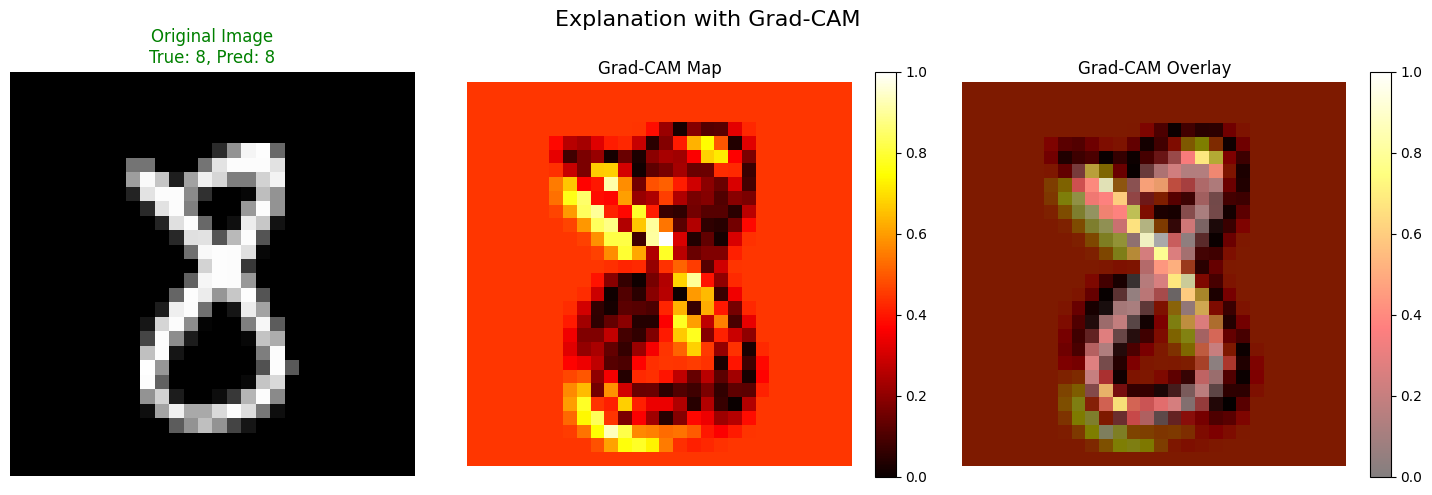

Processing image 1/3 - True: 0, Predicted: 0


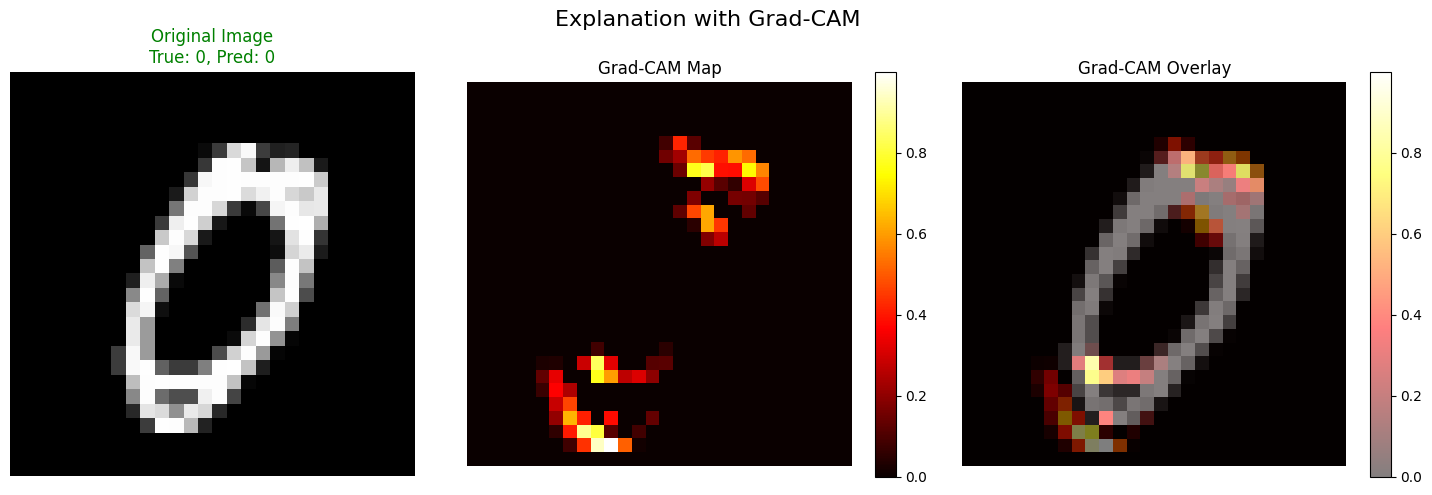

Processing image 2/3 - True: 1, Predicted: 1


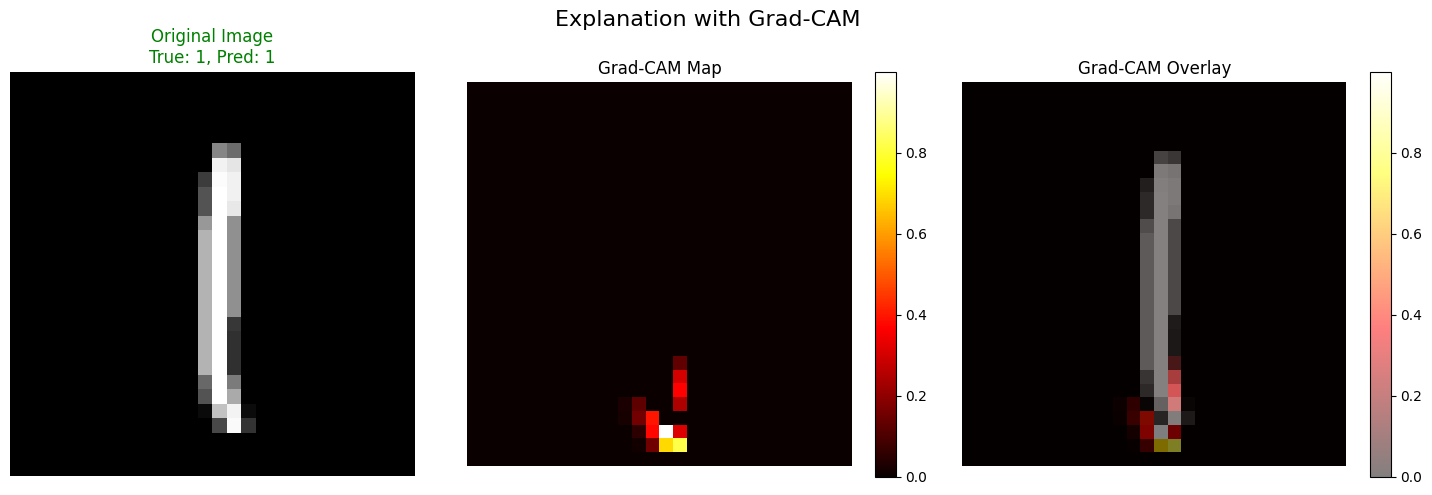

Processing image 3/3 - True: 1, Predicted: 1


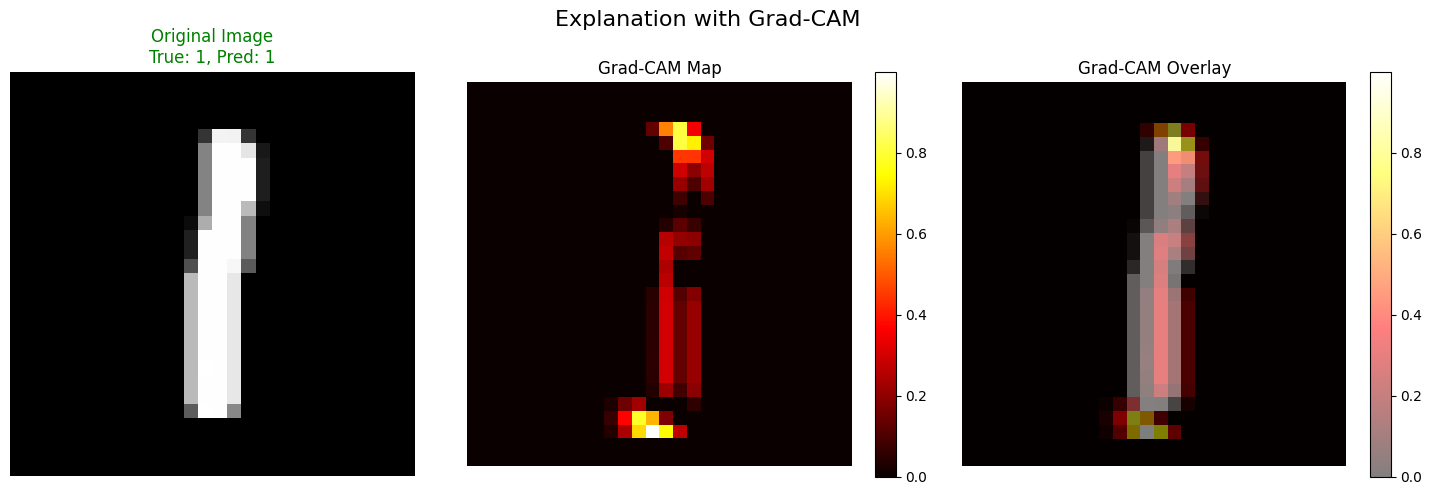

In [29]:
def visualize_gradcam_examples(model, test_loader, n_samples=4, filter_percentile=None):

    """
    Function that uses Grad-CAM to explain model predictions.
    Args:
        model: PyTorch model to explain.
        test_loader: DataLoader for test data.
        n_samples: Number of samples to analyze.
        filter_percentile (float, optional): Percentile threshold for visualization filtering.
    """

    model.eval()
    device = next(model.parameters()).device
    model = model.to(device)

    # pick random images
    images, labels = pick_random_images_from_loader(test_loader, n_samples)

    # Grad-CAM Initialization
    try:
        target_layer = model.conv1
        layer_gradcam = LayerGradCam(model, target_layer)
    except AttributeError:
        print("Attention: Target layer not found. Grad-CAM disabled.")
        return


    # Analyze each selected image
    for i in range(min(n_samples, len(images))):
        img_tensor = images[i]
        true_label = labels[i].item() # Convert label tensor to int

        # image preprocessing
        img_tensor_unsqueezed, orig_img_np, _ = preprocess_image_for_xai(img_tensor)
        img_tensor_unsqueezed = img_tensor_unsqueezed.to(device) # Move input tensor to the correct device

        # model prediction
        predicted_class, confidence, _ = get_model_prediction(model, img_tensor_unsqueezed)

        print(f"Processing image {i+1}/{n_samples} - True: {true_label}, Predicted: {predicted_class}")

        # Calculate Grad-CAM attribution
        gradcam_attr = layer_gradcam.attribute(img_tensor_unsqueezed, target=predicted_class)

        # Resize Grad-CAM map to match original image dimensions (28x28)
        gradcam_map = F.interpolate(
            gradcam_attr,
            size=(28, 28),
            mode='bilinear',
            align_corners=False
        ).squeeze().cpu().detach().numpy()


        # visualize the results
        display_xai_explanation(
            original_image_np=orig_img_np, # Use the preprocessed numpy image
            attribution_map=gradcam_map, # Use the resized Grad-CAM map
            true_label=true_label,
            predicted_class=predicted_class,
            technique_title='Grad-CAM',
            cmap='hot',
            overlay_alpha=0.5,
            show_colorbar=True,
            filter_percentile=filter_percentile, # Pass filter setting
            use_divergent=False # Grad-CAM typically focuses on positive contributions
        )


visualize_gradcam_examples(model, test_loader, n_samples=3, filter_percentile=None) # no filter, better results but background with colors

visualize_gradcam_examples(model, test_loader, n_samples=3, filter_percentile=80) # filter, worse results, but black background

## XAI Techniques comparison and final considerations

=== RAW VISUALIZATION ===


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

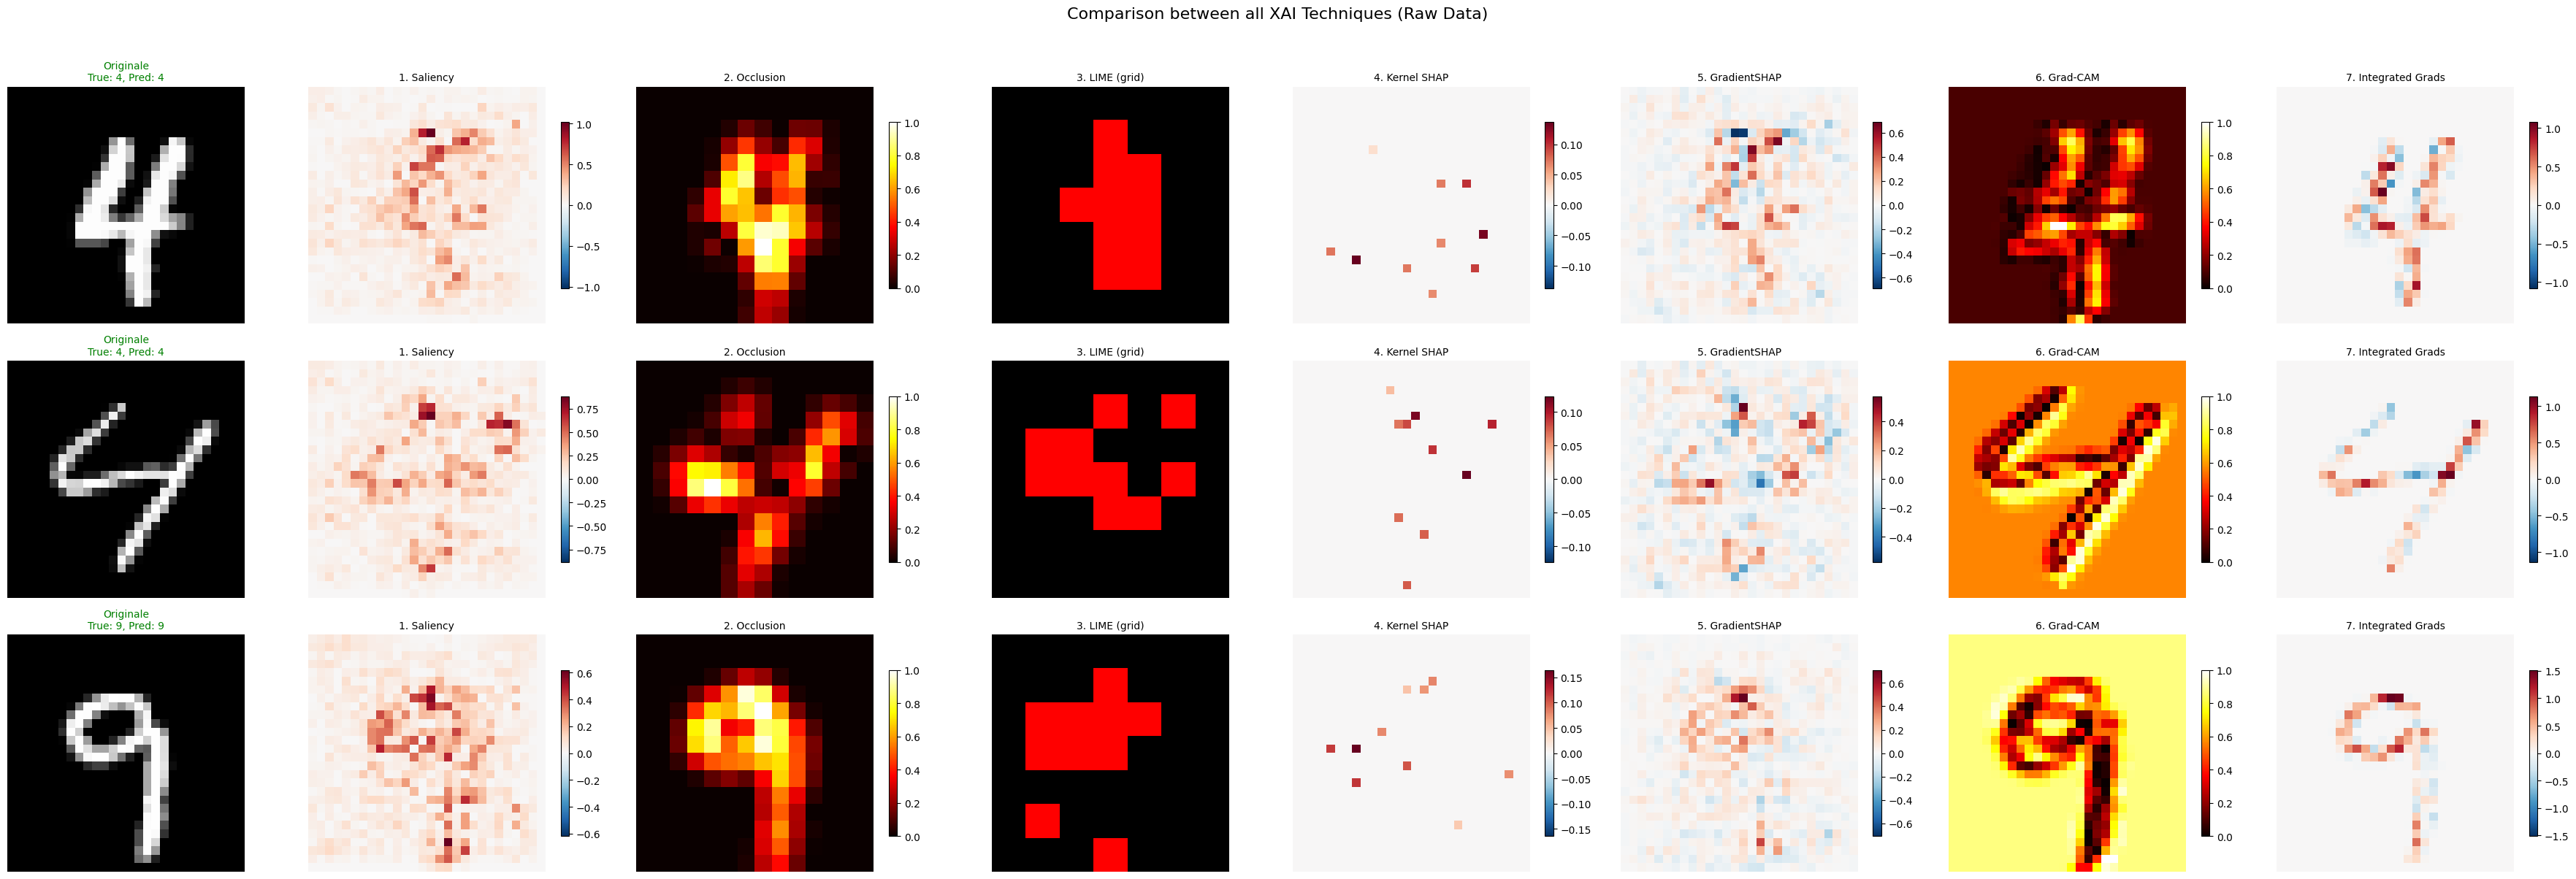


=== FILTERED VISUALIZATION ===


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

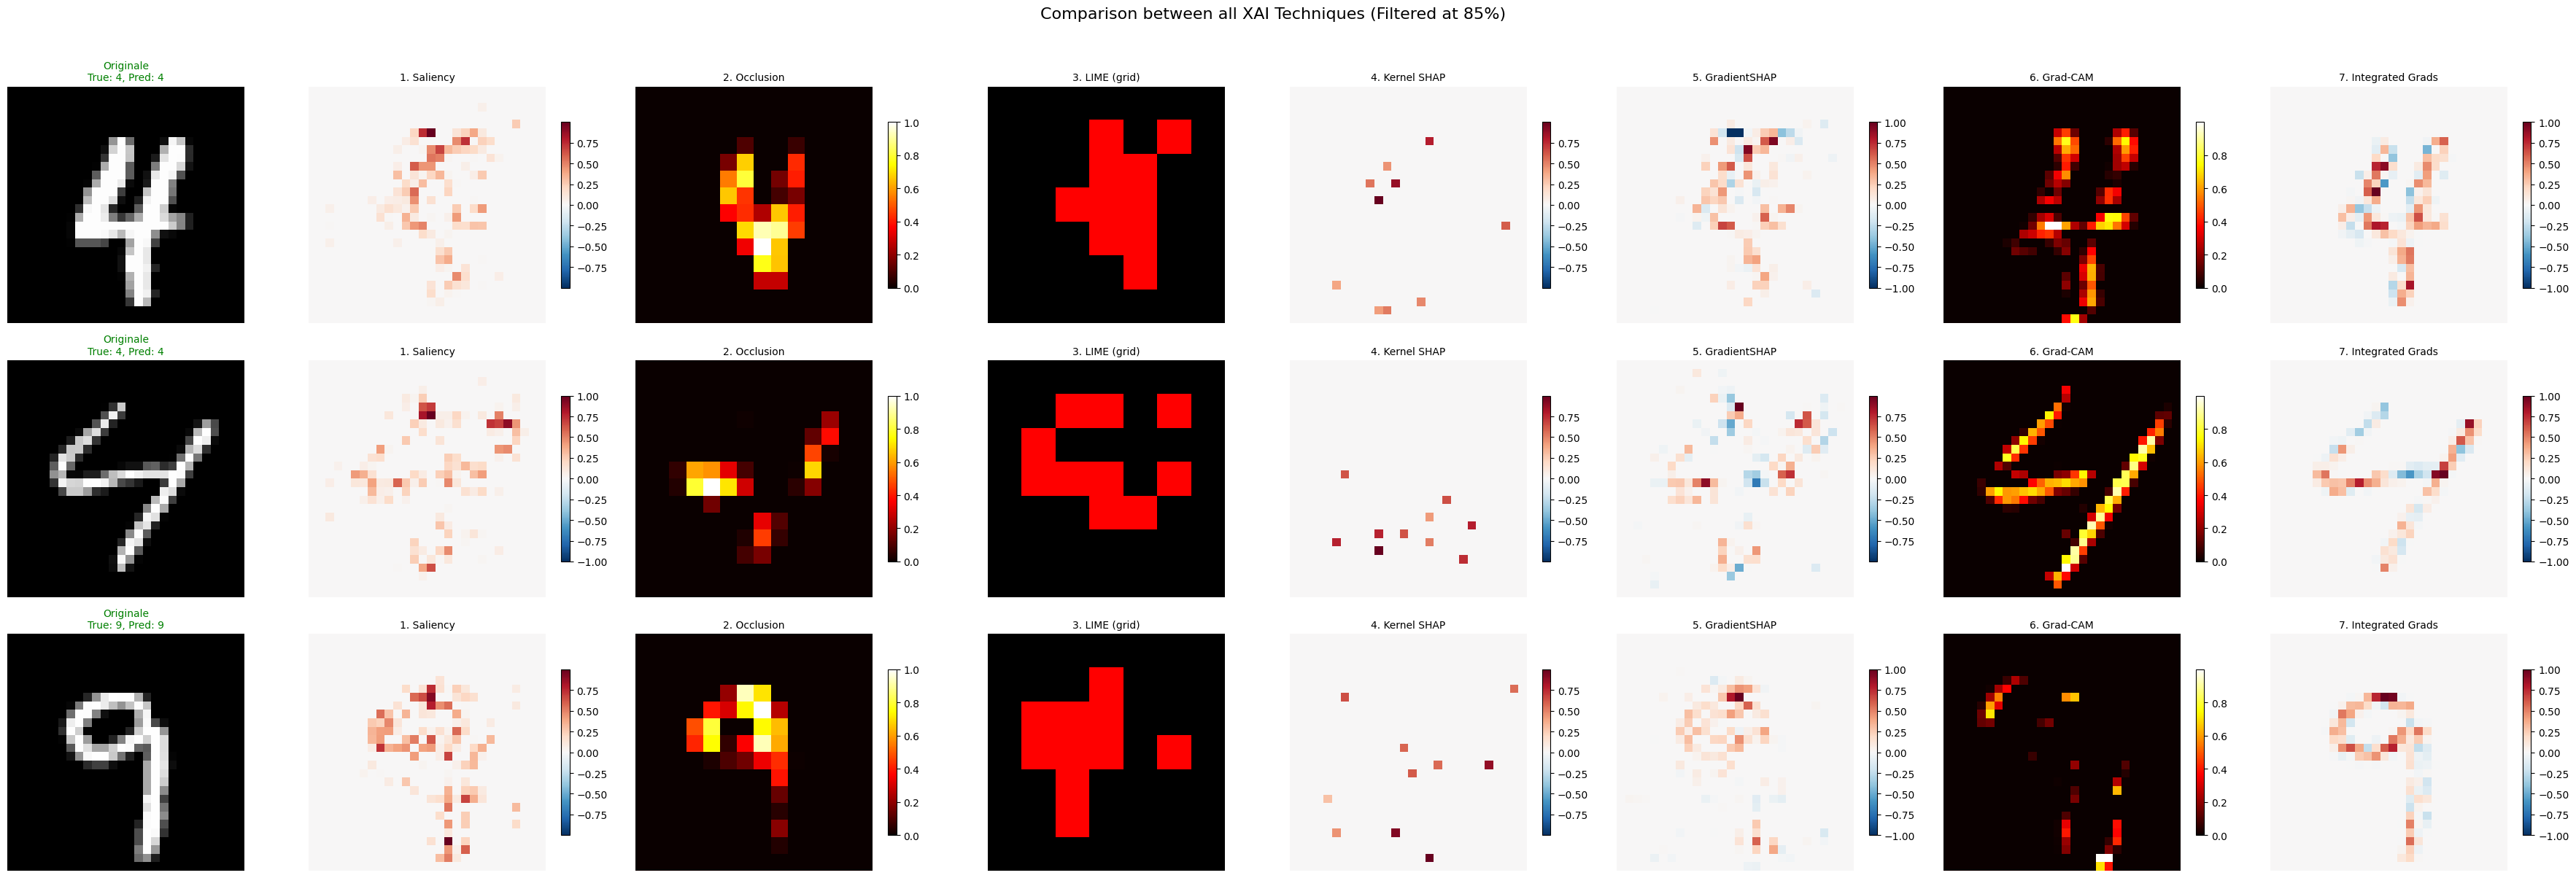


=== FILTERED VISUALIZATION (POSITIVE ONLY) ===


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

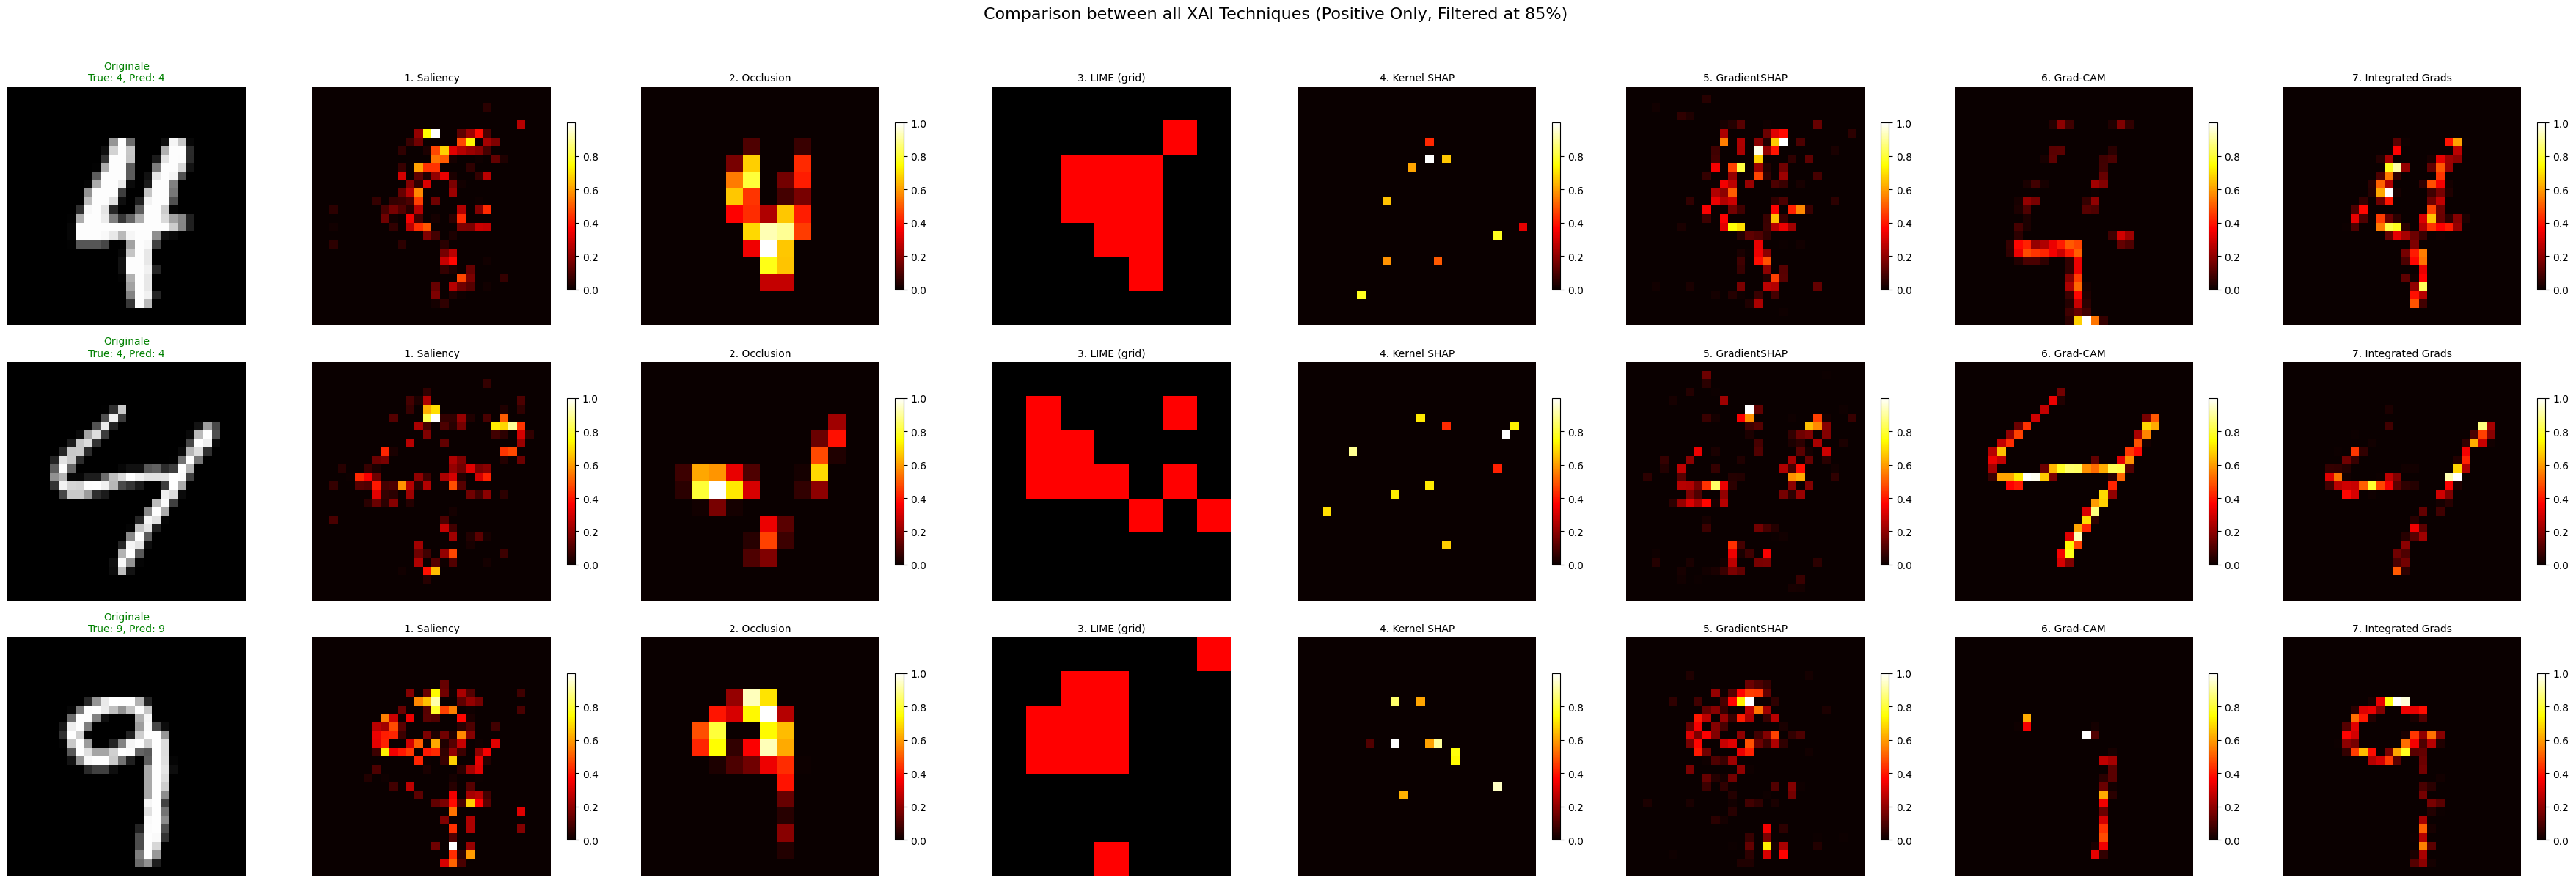

In [30]:
def compare_all_xai_techniques(
    model,
    test_loader,
    n_samples=3,
    lime_segmentation_method='grid',
    grid_size=7,
    n_background_shap=50,
    n_samples_shap=500,
    visualization_mode='all',  # 'raw', 'filtered', 'positive', 'all'
    percentile_threshold=85
):
    """
    Unified visual comparison between all XAI techniques with proper divergent support.

    Args:
        model: PyTorch model.
        test_loader: DataLoader for test data.
        n_samples (int): Number of samples to analyze.
        lime_segmentation_method (str): 'grid' or 'quickshift' for LIME.
        grid_size (int): Grid size for LIME segmentation.
        n_background_shap (int): Number of background samples for SHAP.
        n_samples_shap (int): Number of samples for SHAP.
        visualization_mode (str): 'raw', 'filtered', 'positive', or 'all'.
        percentile_threshold (int): Threshold percentile for filtering (0-100).
    """

    if visualization_mode not in ['raw', 'filtered', 'positive', 'all']:
        raise ValueError("visualization_mode must be 'raw', 'filtered', 'positive', or 'all'")

    model.eval()
    model = model.to(device)

    # 1. DATA PREPARATION
    total_images_needed = n_samples + n_background_shap
    all_images, all_labels = pick_random_images_from_loader(test_loader, total_images_needed)

    test_images = all_images[:n_samples]
    test_labels = all_labels[:n_samples]
    background_images_shap = all_images[n_samples:n_samples + n_background_shap]

    # 2. XAI MODELS PREPARATION
    saliency = Saliency(model)
    occlusion = Occlusion(model)
    integrated_gradients = IntegratedGradients(model)

    # Prepare Grad-CAM
    layer_gradcam = None
    try:
        target_layer = model.conv1
        layer_gradcam = LayerGradCam(model, target_layer)
    except AttributeError:
        print("Attention: Target layer (e.g., model.conv1) not found for Grad-CAM.")

    gradient_shap = GradientShap(model)
    baselines_gs = torch.randn_like(test_images) * 0.1
    baselines_gs = baselines_gs.to(device)

    # Prepare LIME helpers
    explainer_lime, lime_predict_fn, segmenter_lime = make_lime_helpers(
        model, segmentation_method=lime_segmentation_method, grid_size=grid_size
    )

    # Prepare Kernel SHAP explainer
    background_data_flat_shap = background_images_shap.cpu().numpy().reshape(n_background_shap, -1)
    def shap_predict_fn_wrapper(x_flat):
        x_tensor = torch.FloatTensor(x_flat).reshape(-1, 1, 28, 28).to(device)
        with torch.no_grad():
            outputs = model(x_tensor)
            probabilities = F.softmax(outputs, dim=1)
        return probabilities.cpu().numpy()
    explainer_shap = shap.KernelExplainer(shap_predict_fn_wrapper, background_data_flat_shap)

    # Helper functions for plotting
    def plot_attribution_map(ax, raw_map, title, cmap='hot', use_divergent=False,
                            apply_filter=False, filter_percentile=85, positive_only=False):
        """
        Helper to plot attribution maps with optional filtering, divergent handling, and positive-only mode.
        """
        # Apply positive-only filtering first if requested
        if positive_only:
            display_map = raw_map.copy()
            display_map[display_map < 0] = 0  # Set negative values to 0
            use_divergent = False  # Force non-divergent for positive-only
            cmap = 'hot'  # Force hot colormap for positive-only
        else:
            display_map = raw_map.copy()

        # Apply percentile filtering
        if apply_filter:
            if use_divergent and not positive_only:
                abs_map = np.abs(display_map)
                threshold = np.percentile(abs_map, filter_percentile)
                important_mask = abs_map > threshold
                filtered_map = np.zeros_like(display_map)
                if important_mask.any():
                    important_abs_values = abs_map[important_mask]
                    scale_factor = (important_abs_values - threshold) / (important_abs_values.max() - threshold + 1e-8)
                    filtered_map[important_mask] = np.sign(display_map[important_mask]) * scale_factor
                display_map = filtered_map
            else:
                abs_map = np.abs(display_map)
                threshold = np.percentile(abs_map, filter_percentile)
                important_mask = abs_map > threshold
                filtered_map = np.zeros_like(abs_map)
                if important_mask.any():
                    important_values = abs_map[important_mask]
                    filtered_map[important_mask] = (important_values - threshold) / (important_values.max() - threshold + 1e-8)
                display_map = filtered_map
        else:
            if not use_divergent or positive_only:
                abs_map = np.abs(display_map)
                if abs_map.max() > abs_map.min():
                    display_map = (abs_map - abs_map.min()) / (abs_map.max() - abs_map.min())
                else:
                    display_map = abs_map

        # Set color range
        if use_divergent and not positive_only:
            abs_max = max(abs(display_map.min()), abs(display_map.max()))
            if abs_max > 0:
                vmin, vmax = -abs_max, abs_max
            else:
                vmin, vmax = 0, 1
        else:
            vmin, vmax = display_map.min(), display_map.max()

        im = ax.imshow(display_map, cmap=cmap, vmin=vmin, vmax=vmax, interpolation='nearest')
        return im

    def create_visualization(mode_name, apply_filter, positive_only=False):
        """Create a single visualization (raw, filtered, or positive-only)"""
        n_cols = 8
        fig, axes = plt.subplots(n_samples, n_cols, figsize=(4.5 * n_cols, 4 * n_samples))
        if n_samples == 1:
            axes = axes.reshape(1, -1)

        for i in range(n_samples):
            img_tensor = test_images[i]
            true_label = test_labels[i].item()

            img_tensor_unsqueezed, orig_img_np, image_rgb_uint8 = preprocess_image_for_xai(img_tensor)
            img_tensor_device = img_tensor_unsqueezed.to(device)

            predicted_class, confidence, _ = get_model_prediction(model, img_tensor_device.detach())

            # 1. Original image
            color = 'green' if predicted_class == true_label else 'red'
            axes[i, 0].imshow(orig_img_np, cmap='gray')
            axes[i, 0].set_title(f'Originale\nTrue: {true_label}, Pred: {predicted_class}', color=color, fontsize=10)
            axes[i, 0].axis('off')

            # 2. Saliency Map
            saliency_input = img_tensor_device.detach().requires_grad_(True)
            saliency_attr = saliency.attribute(saliency_input, target=predicted_class)
            base_cmap = 'hot' if positive_only else 'RdBu_r'
            use_div = not positive_only
            im = plot_attribution_map(axes[i, 1], saliency_attr.squeeze().cpu().detach().numpy(),
                                    '1. Saliency', cmap=base_cmap, use_divergent=use_div,
                                    apply_filter=apply_filter, filter_percentile=percentile_threshold,
                                    positive_only=positive_only)
            fig.colorbar(im, ax=axes[i, 1], shrink=0.7)
            axes[i, 1].set_title('1. Saliency', fontsize=10)
            axes[i, 1].axis('off')

            # 3. Occlusion
            occlusion_attr = occlusion.attribute(img_tensor_device.detach(), target=predicted_class,
                                               strides=(1, 2, 2), sliding_window_shapes=(1, 4, 4), baselines=-1.0)
            im = plot_attribution_map(axes[i, 2], occlusion_attr.squeeze().cpu().detach().numpy(),
                                    '2. Occlusion', cmap='hot', use_divergent=False,
                                    apply_filter=apply_filter, filter_percentile=percentile_threshold,
                                    positive_only=positive_only)
            fig.colorbar(im, ax=axes[i, 2], shrink=0.7)
            axes[i, 2].set_title('2. Occlusion', fontsize=10)
            axes[i, 2].axis('off')

            # 4. LIME (special handling for positive_only)
            if positive_only:
                # For LIME in positive mode, we use positive_only=True
                explanation_lime = explainer_lime.explain_instance(image_rgb_uint8, lime_predict_fn,
                                                                 top_labels=10, hide_color=0, num_samples=1000,
                                                                 segmentation_fn=segmenter_lime)
                min_weight = 0.01 if apply_filter else 0.0
                _, mask_lime = explanation_lime.get_image_and_mask(predicted_class, positive_only=True,
                                                                 num_features=10, hide_rest=False, min_weight=min_weight)
            else:
                explanation_lime = explainer_lime.explain_instance(image_rgb_uint8, lime_predict_fn,
                                                                 top_labels=10, hide_color=0, num_samples=1000,
                                                                 segmentation_fn=segmenter_lime)
                min_weight = 0.01 if apply_filter else 0.0
                _, mask_lime = explanation_lime.get_image_and_mask(predicted_class, positive_only=False,
                                                                 num_features=10, hide_rest=False, min_weight=min_weight)

            axes[i, 3].imshow(label2rgb(mask_lime, bg_label=0, colors=['red']), interpolation='nearest')
            axes[i, 3].set_title(f'3. LIME ({lime_segmentation_method})', fontsize=10)
            axes[i, 3].axis('off')

            # 5. Kernel SHAP
            img_flat = img_tensor_unsqueezed.detach().cpu().numpy().reshape(1, -1)
            shap_values = explainer_shap.shap_values(img_flat, nsamples=n_samples_shap)
            shap_for_class = shap_values[predicted_class][0] if isinstance(shap_values, list) else shap_values[0, :, predicted_class]
            shap_map = shap_for_class.reshape(28, 28)
            base_cmap = 'hot' if positive_only else 'RdBu_r'
            use_div = not positive_only
            im = plot_attribution_map(axes[i, 4], shap_map, '4. Kernel SHAP', cmap=base_cmap,
                                    use_divergent=use_div, apply_filter=apply_filter,
                                    filter_percentile=percentile_threshold, positive_only=positive_only)
            fig.colorbar(im, ax=axes[i, 4], shrink=0.7)
            axes[i, 4].set_title('4. Kernel SHAP', fontsize=10)
            axes[i, 4].axis('off')

            # 6. GradientSHAP
            gs_attr = gradient_shap.attribute(img_tensor_device.detach(),
                                            baselines=baselines_gs[:min(len(baselines_gs), 10)],
                                            target=predicted_class, n_samples=50)
            base_cmap = 'hot' if positive_only else 'RdBu_r'
            use_div = not positive_only
            im = plot_attribution_map(axes[i, 5], gs_attr.squeeze().cpu().detach().numpy(),
                                    '5. GradientSHAP', cmap=base_cmap, use_divergent=use_div,
                                    apply_filter=apply_filter, filter_percentile=percentile_threshold,
                                    positive_only=positive_only)
            fig.colorbar(im, ax=axes[i, 5], shrink=0.7)
            axes[i, 5].set_title('5. GradientSHAP', fontsize=10)
            axes[i, 5].axis('off')

            # 7. Grad-CAM
            if layer_gradcam:
                gradcam_attr = layer_gradcam.attribute(img_tensor_device.detach(), target=predicted_class)
                gradcam_map = F.interpolate(gradcam_attr, size=(28, 28), mode='bilinear', align_corners=False)
                gradcam_map = gradcam_map.squeeze().cpu().detach().numpy()
                im = plot_attribution_map(axes[i, 6], gradcam_map, '6. Grad-CAM', cmap='hot',
                                        use_divergent=False, apply_filter=apply_filter,
                                        filter_percentile=percentile_threshold, positive_only=positive_only)
                fig.colorbar(im, ax=axes[i, 6], shrink=0.7)
                axes[i, 6].set_title('6. Grad-CAM', fontsize=10)
                axes[i, 6].axis('off')
            else:
                axes[i, 6].text(0.5, 0.5, 'Grad-CAM\nDisabled', ha='center', va='center', fontsize=10)
                axes[i, 6].axis('off')

            # 8. Integrated Gradients
            baseline_ig = torch.zeros_like(img_tensor_device).to(device) - 1.0
            ig_attr = integrated_gradients.attribute(img_tensor_device.detach(), baselines=baseline_ig,
                                                   target=predicted_class, n_steps=50)
            base_cmap = 'hot' if positive_only else 'RdBu_r'
            use_div = not positive_only
            im = plot_attribution_map(axes[i, 7], ig_attr.squeeze().cpu().detach().numpy(),
                                    '7. Integrated Grads', cmap=base_cmap, use_divergent=use_div,
                                    apply_filter=apply_filter, filter_percentile=percentile_threshold,
                                    positive_only=positive_only)
            fig.colorbar(im, ax=axes[i, 7], shrink=0.7)
            axes[i, 7].set_title('7. Integrated Grads', fontsize=10)
            axes[i, 7].axis('off')

        # Create appropriate title based on mode
        if positive_only:
            filter_text = f" (Positive Only, Filtered at {percentile_threshold}%)" if apply_filter else " (Positive Only)"
        else:
            filter_text = f" (Filtered at {percentile_threshold}%)" if apply_filter else " (Raw Data)"

        plt.suptitle(f'Comparison between all XAI Techniques{filter_text}', fontsize=16, y=1.0)
        plt.tight_layout(rect=[0, 0, 1, 0.98])
        plt.show()

    # Execute based on visualization_mode
    if visualization_mode == 'raw':
        create_visualization('Raw', apply_filter=False, positive_only=False)
    elif visualization_mode == 'filtered':
        create_visualization('Filtered', apply_filter=True, positive_only=False)
    elif visualization_mode == 'positive':
        create_visualization('Positive Only', apply_filter=True, positive_only=True)
    elif visualization_mode == 'all':
        print("=== RAW VISUALIZATION ===")
        create_visualization('Raw', apply_filter=False, positive_only=False)
        print("\n=== FILTERED VISUALIZATION ===")
        create_visualization('Filtered', apply_filter=True, positive_only=False)
        print("\n=== FILTERED VISUALIZATION (POSITIVE ONLY) ===")
        create_visualization('Positive Only', apply_filter=True, positive_only=True)


# Esempio di utilizzo con tutte le modalità di visualizzazione
compare_all_xai_techniques(model, test_loader, n_samples=3, visualization_mode='all', percentile_threshold=85)

**Techniques comparison discussion (refered to mnist dataset)**

1. Saliency
Gradient based, fast and simple to implement, but attributions are noisy.
It identifies the more important pixels but often result in a confusing shape, good as baseline

2. Occlusion  
Perturbation-based method, it evaluates "blocks" of the image, excels on high-contrast datasets like MNIST, identifying which parts of the digit are most critical for the prediction. The output can be blurry due to the window size, but its explanation is one of the most intuitive and reliable for this task.

3. LIME (GRID SEGMENTATION ALGORITHM)  
Provides explanation based on superpixels. The rigid grid segmentation captures very well the structure, but has low precision (rigid blocks not aligned with digits)

4. Kernel SHAP  
Model-agnostic, highlights sparse pixels but loses spatial coherence since it treats features independently. Difficult to interpret on images, better suited to tabular data.

5. GradientSHAP
Improves over Saliency by averaging gradients from multiple baselines, but in this dataset it has more or less the same performance of Saliency, it's better to use other methods

6. Grad-CAM  
This technique produces a class-activation map that is excellent for localization, providing a very clean and understandable explanation of the model's attention.
Heatmaps are low-resolution, as it's derived from the final convolutional layer, but overall is one of the best techniques to use every time we work woth images

7. Integrated Gradients
Captures continuous contribution along the baseline-to-input path. Results are sharp, follow digit contours well, and offer the one of the best explanations for MNIST among all methods.

**Conclusion**  
Overall, all the techniques shown provided some insights of what the model "looks" when making a prediction, but I have to say that on **MNIST**, using my model and XAI techniques setup, **Integrated Gradients** provide the clearest and most faithful attributions. **Grad-CAM** is very good for localization but provides low resolution images. **Occlusion** is intuitive and reliable but a little blurry.

# Phase 3: Error analysis

In [31]:
# Set the model to evaluation mode
model.eval()

# Create empty lists to store misclassified images, true labels, and predicted labels
misclassified_images = []
true_labels = []
predicted_labels = []

# Iterate through the test loader
with torch.no_grad():
    for images, labels in test_loader:
        # Move images and labels to the device
        images, labels = images.to(device), labels.to(device)

        # Get model predictions
        outputs = model(images)

        # Determine the predicted class for each image
        _, predicted = torch.max(outputs, 1)

        # Identify misclassified images
        misclassified_mask = (predicted != labels)

        # Store misclassified images and their labels
        misclassified_images.extend(images[misclassified_mask].cpu())
        true_labels.extend(labels[misclassified_mask].cpu())
        predicted_labels.extend(predicted[misclassified_mask].cpu())

print(f"Found {len(misclassified_images)} misclassified images.")

Found 117 misclassified images.


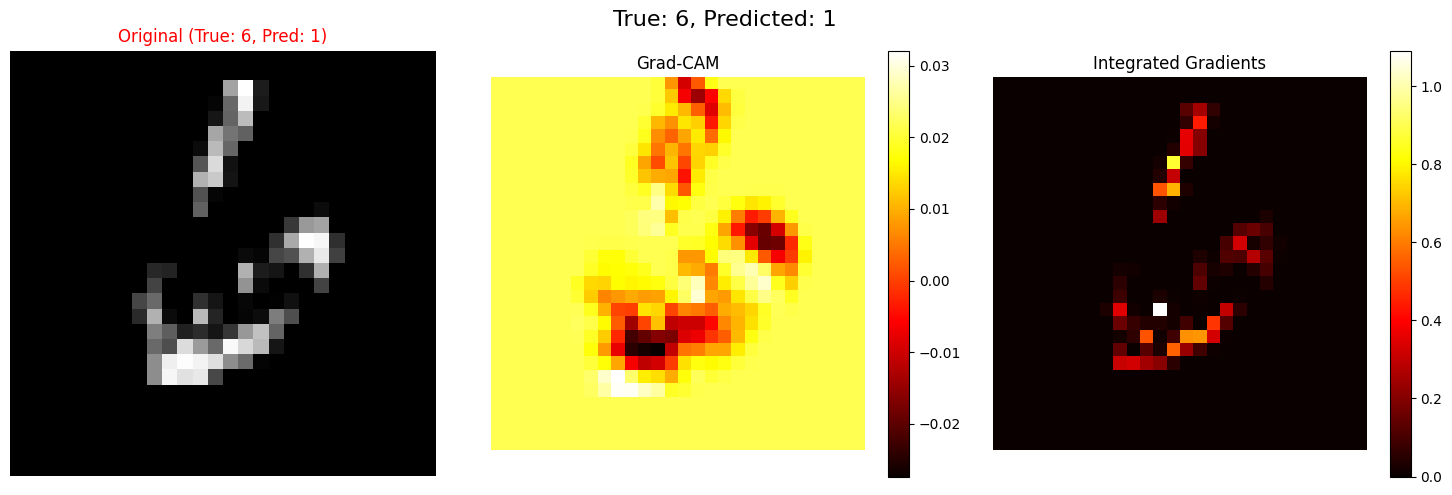

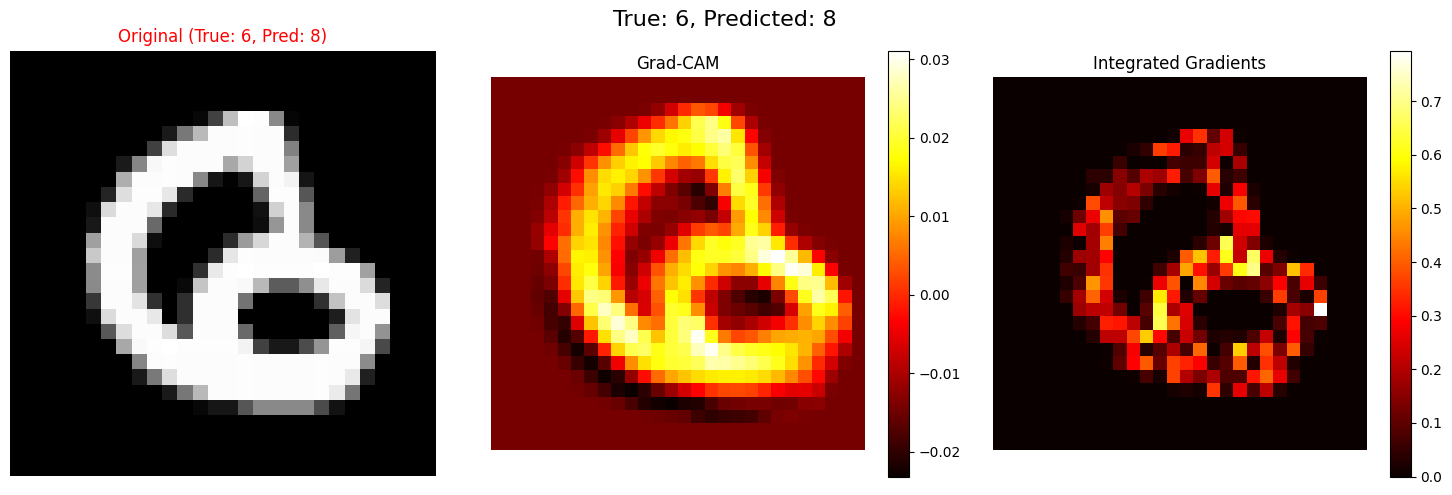

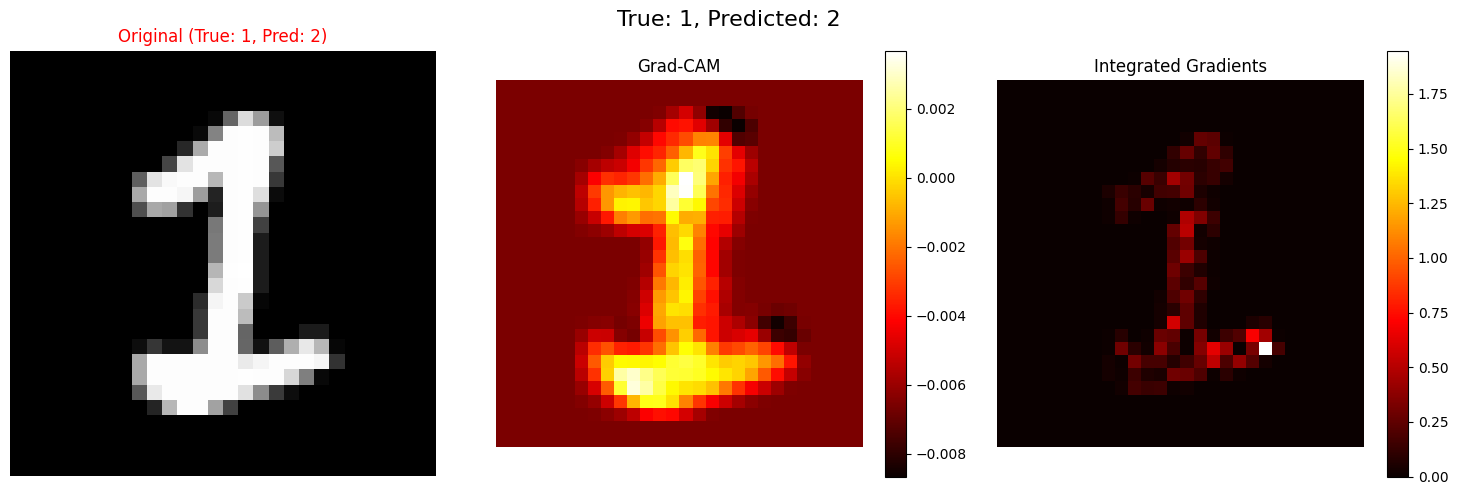

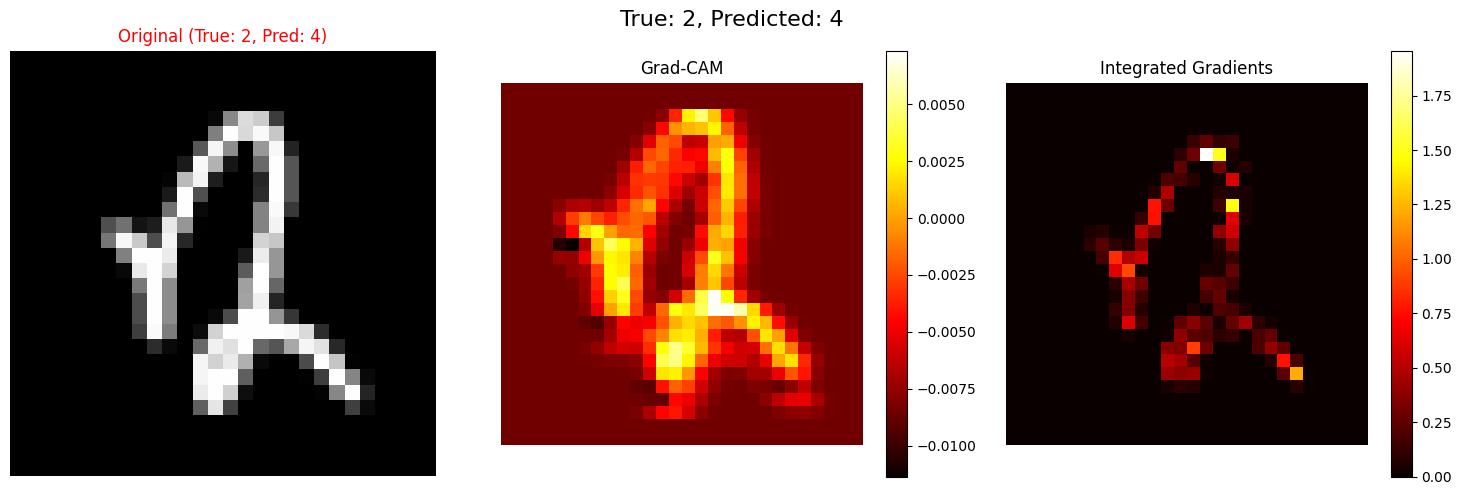

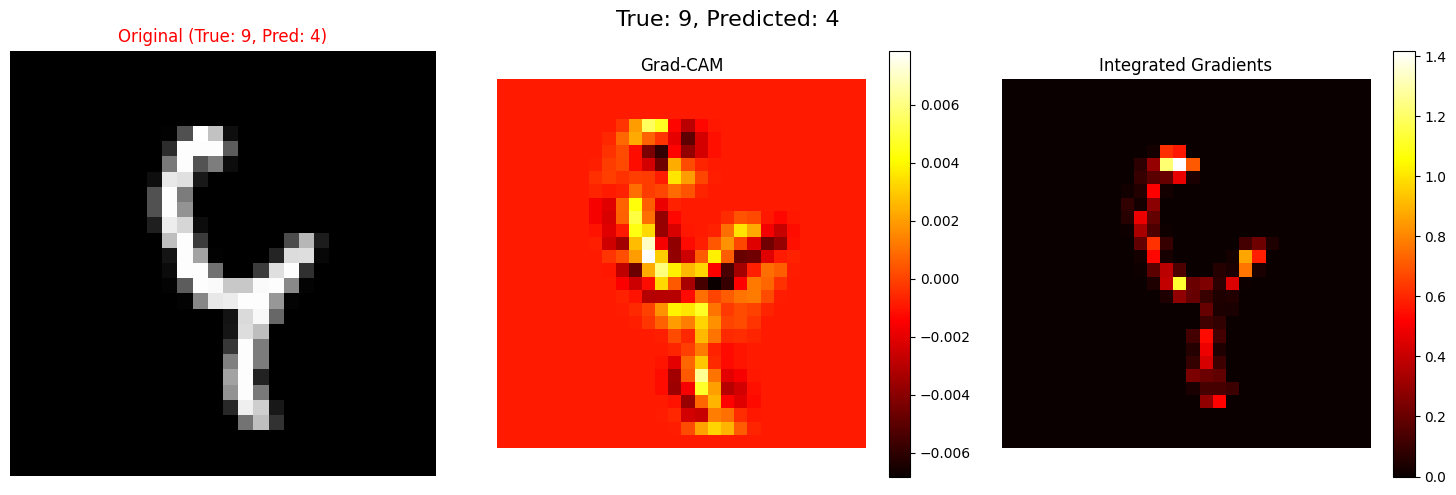

In [32]:
def analyze_and_visualize_misclassified(model, misclassified_images, true_labels, predicted_labels,
                                      preprocess_image_for_xai, max_images=5,
                                      target_layer_name='conv1', n_steps=50):
    """
    Analyzes and visualizes misclassified images using Grad-CAM and Integrated Gradients.

    Args:
        model: PyTorch model to analyze.
        misclassified_images: List of misclassified images.
        true_labels: List of true labels for the misclassified images.
        predicted_labels: List of predicted labels for the misclassified images.
        preprocess_image_for_xai: Function to preprocess the image for XAI.
        max_images: Maximum number of images to visualize.
        target_layer_name: Name of the target layer for Grad-CAM.
        n_steps: Number of steps for Integrated Gradients.

    Returns:
        Tuple: (gradcam_results, ig_results) containing the results of Grad-CAM and Integrated Gradients.
    """

    # Set model to evaluation mode
    model.eval()
    model = model.to(device)

    # Randomly select images to analyze
    import random
    total_images = len(misclassified_images)
    num_to_analyze = min(max_images, total_images)

    if total_images > num_to_analyze:
        selected_indices = random.sample(range(total_images), num_to_analyze)
    else:
        selected_indices = list(range(num_to_analyze))

    # Initialize Grad-CAM
    target_layer = getattr(model, target_layer_name)
    layer_gradcam = LayerGradCam(model, target_layer)

    # Initialize Integrated Gradients
    ig = IntegratedGradients(model)

    # Lists to store results
    gradcam_results = []
    ig_results = []

    # Process each selected misclassified image
    for idx in selected_indices:
        img_tensor = misclassified_images[idx]
        true_label = true_labels[idx].item()
        predicted_label = predicted_labels[idx].item()

        # Preprocess image for XAI analysis
        img_tensor_unsqueezed, orig_img_np, _ = preprocess_image_for_xai(img_tensor)
        img_tensor_device = img_tensor_unsqueezed.to(device)

        # Generate Grad-CAM attribution for predicted class
        gradcam_attr = layer_gradcam.attribute(img_tensor_device, target=predicted_label)

        # Resize Grad-CAM map to match input image size
        gradcam_map = F.interpolate(
            gradcam_attr,
            size=(28, 28),
            mode='bilinear',
            align_corners=False
        ).squeeze().cpu().detach().numpy()


        # Store Grad-CAM results
        gradcam_results.append({
            'original_image_np': orig_img_np,
            'true_label': true_label,
            'predicted_label': predicted_label,
            'gradcam_map': gradcam_map
        })

        # Set baseline for Integrated Gradients (black image)
        baseline = torch.zeros_like(img_tensor_device).to(device) - 1.0

        # Generate Integrated Gradients attribution for predicted class
        ig_attr = ig.attribute(
            img_tensor_device,
            baselines=baseline,
            target=predicted_label,
            n_steps=n_steps
        )

        # Convert to numpy array
        ig_map = ig_attr.squeeze().cpu().detach().numpy()

        # Store Integrated Gradients results
        ig_results.append({
            'original_image_np': orig_img_np,
            'true_label': true_label,
            'predicted_label': predicted_label,
            'ig_map': ig_map
        })


    # Visualize the selected images
    for i, idx in enumerate(selected_indices):
        # Get data for current image
        gradcam_data = gradcam_results[i]
        ig_data = ig_results[i]

        original_image_np = gradcam_data['original_image_np']
        true_label = gradcam_data['true_label']
        predicted_label = gradcam_data['predicted_label']
        gradcam_map = gradcam_data['gradcam_map']
        ig_map = ig_data['ig_map']

        # Create visualization with 3 columns: Original, Grad-CAM, Integrated Gradients
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        # 1. Original image
        axes[0].imshow(original_image_np, cmap='gray')
        axes[0].set_title(f'Original (True: {true_label}, Pred: {predicted_label})', color='red')
        axes[0].axis('off')

        # 2. Grad-CAM heatmap
        im_gradcam = axes[1].imshow(gradcam_map, cmap='hot', interpolation='nearest')
        axes[1].set_title('Grad-CAM')
        axes[1].axis('off')
        fig.colorbar(im_gradcam, ax=axes[1])

        # 3. Integrated Gradients map (absolute values)
        im_ig = axes[2].imshow(np.abs(ig_map), cmap='hot', interpolation='nearest')
        axes[2].set_title('Integrated Gradients')
        axes[2].axis('off')
        fig.colorbar(im_ig, ax=axes[2])

        plt.suptitle(f'True: {true_label}, Predicted: {predicted_label}',
                     fontsize=16)
        plt.tight_layout()
        plt.show()

    return gradcam_results, ig_results



gradcam_results, ig_results = analyze_and_visualize_misclassified(
    model=model,
    misclassified_images=misclassified_images,
    true_labels=true_labels,
    predicted_labels=predicted_labels,
    preprocess_image_for_xai=preprocess_image_for_xai,
    max_images=5,
    target_layer_name='conv1',
    n_steps=50
)

**Error Analysis Observations:**

The inspection of misclassified samples with Grad-CAM and Integrated Gradients shows that the model generally attends to the digit itself rather than irrelevant background. Most errors arise from poorly written digits, which are ambiguous to understand even for humans.

In other cases, misclassifications comes from digit overlap in handwriting styles. For example, a "9" may resemble a "4" depending on how it is drawn, and a poorly closed "8" can resemble a "0" with background noise. These confusions highlight the natural variability of handwritten input rather than a clear model failure.

To address such issues, two strategies can be considered:

- Data cleaning: reducing or filtering problematic samples with severe ambiguity.

- Data enrichment (recommended): adding more representative samples of ambiguous digit styles to improve model robustness.

# Phase 3 (optional): Full explainable system that can make the same classification, offering further insights on model decision

In [33]:
# Converting PyTorch tensors to NumPy arrays and flatten the images
X_train = train_dataset.data.numpy().reshape(-1, 28 * 28)
y_train = train_dataset.targets.numpy()
X_test = test_dataset.data.numpy().reshape(-1, 28 * 28)
y_test = test_dataset.targets.numpy()

# Training a Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=8, random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model
accuracy = dt_model.score(X_test, y_test)
print(f"\nDecision Tree Classifier Accuracy on test set: {accuracy:.4f}")


Decision Tree Classifier Accuracy on test set: 0.8185


### Visualizing Decision Tree Decisions

To illustrate how the Decision Tree makes predictions, we can visualize a small part of the tree or trace the decision path for a specific image.

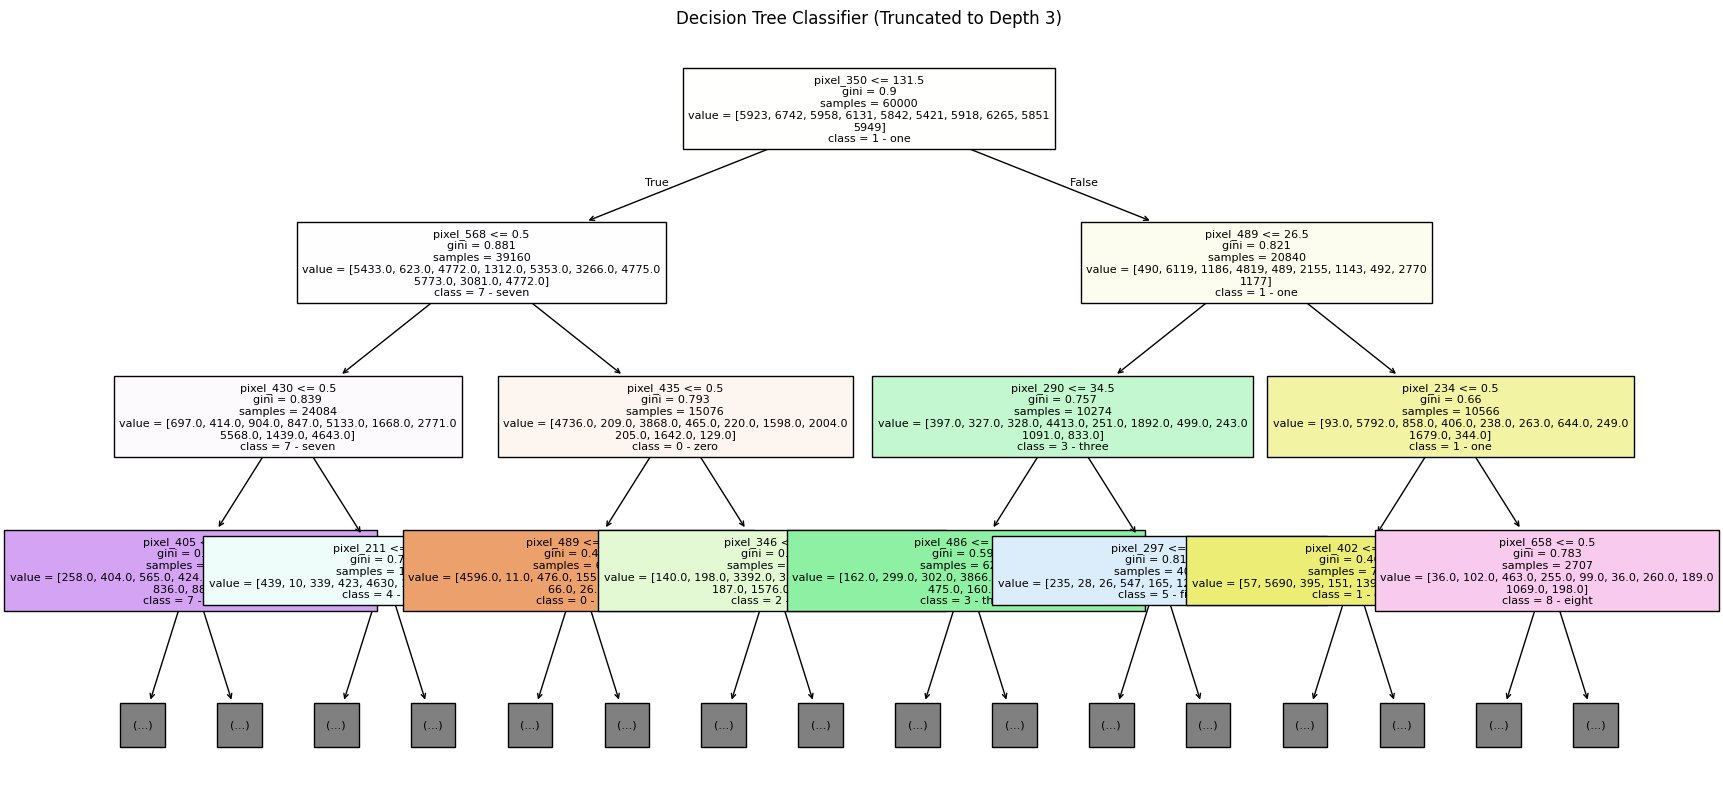

In [34]:
# Plot the Decision Tree Classifier (truncated for readability)
plt.figure(figsize=(20, 10))
plot_tree(dt_model, max_depth=3, feature_names=[f'pixel_{i}' for i in range(X_train.shape[1])],
          class_names=[classes[i] for i in dt_model.classes_], filled=True, fontsize=8)
plt.title('Decision Tree Classifier (Truncated to Depth 3)')
plt.show()

While the classical tree diagram provides a global view of the model, it is still challenging to understand the sequence of pixel-level rules applied to a single prediction.
To make the decision process more transparent, I made a custom function that:

- Traces the exact path the decision tree follows for one image.

- Translates raw pixel values into simplified categories (Background, Faint Ink, Intense Ink) for easier readability.

- Shows the inspected pixels directly on the original image, in the same order they were evaluated.

This approach is not perfect, but it provides a practical example of how a white-box model can easily “explain” the reasoning behind a specific prediction.

Step 1: Model inspected a FAINT INK (value: 85-169) pixel.
Step 2: Model inspected a INTENSE INK (value: 170+) pixel.
Step 3: Model inspected a BACKGROUND (value: 0-84) pixel.
Step 4: Model inspected a BACKGROUND (value: 0-84) pixel.
Step 5: Model inspected a BACKGROUND (value: 0-84) pixel.
Step 6: Model inspected a BACKGROUND (value: 0-84) pixel.
Step 7: Model inspected a BACKGROUND (value: 0-84) pixel.
Step 8: Model inspected a BACKGROUND (value: 0-84) pixel.

Prediction: 1
True Label: 1



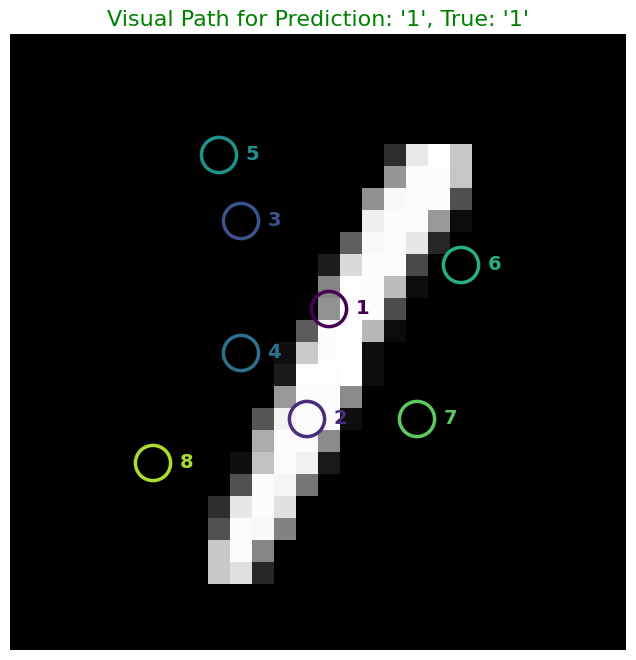

Step 1: Model inspected a INTENSE INK (value: 170+) pixel.
Step 2: Model inspected a BACKGROUND (value: 0-84) pixel.
Step 3: Model inspected a FAINT INK (value: 85-169) pixel.
Step 4: Model inspected a BACKGROUND (value: 0-84) pixel.
Step 5: Model inspected a BACKGROUND (value: 0-84) pixel.
Step 6: Model inspected a INTENSE INK (value: 170+) pixel.
Step 7: Model inspected a BACKGROUND (value: 0-84) pixel.
Step 8: Model inspected a FAINT INK (value: 85-169) pixel.

Prediction: 5
True Label: 5



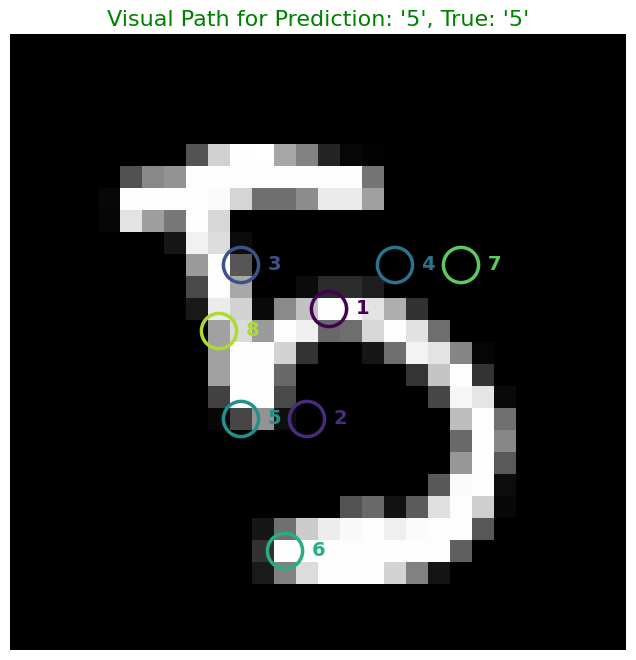

Step 1: Model inspected a INTENSE INK (value: 170+) pixel.
Step 2: Model inspected a BACKGROUND (value: 0-84) pixel.
Step 3: Model inspected a BACKGROUND (value: 0-84) pixel.
Step 4: Model inspected a BACKGROUND (value: 0-84) pixel.
Step 5: Model inspected a BACKGROUND (value: 0-84) pixel.
Step 6: Model inspected a BACKGROUND (value: 0-84) pixel.
Step 7: Model inspected a BACKGROUND (value: 0-84) pixel.
Step 8: Model inspected a BACKGROUND (value: 0-84) pixel.

Prediction: 1
True Label: 1



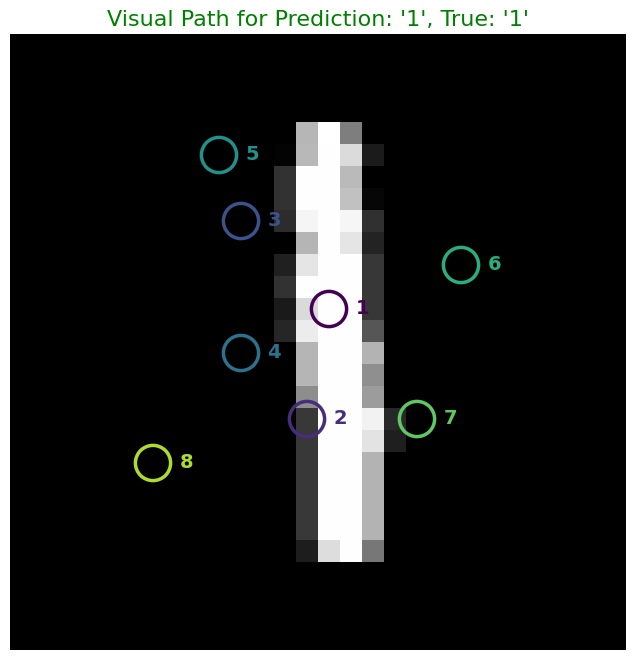

Step 1: Model inspected a BACKGROUND (value: 0-84) pixel.
Step 2: Model inspected a BACKGROUND (value: 0-84) pixel.
Step 3: Model inspected a INTENSE INK (value: 170+) pixel.
Step 4: Model inspected a BACKGROUND (value: 0-84) pixel.
Step 5: Model inspected a INTENSE INK (value: 170+) pixel.
Step 6: Model inspected a BACKGROUND (value: 0-84) pixel.
Step 7: Model inspected a BACKGROUND (value: 0-84) pixel.
Step 8: Model inspected a BACKGROUND (value: 0-84) pixel.

Prediction: 6
True Label: 6



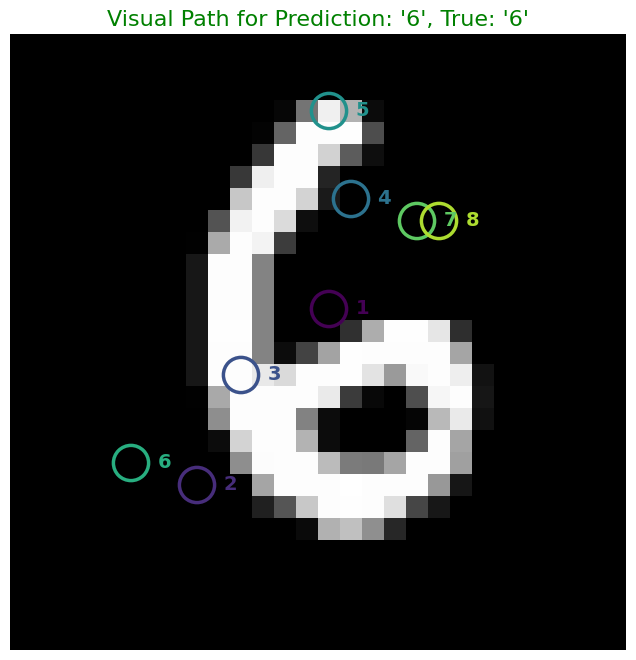

Step 1: Model inspected a BACKGROUND (value: 0-84) pixel.
Step 2: Model inspected a BACKGROUND (value: 0-84) pixel.
Step 3: Model inspected a INTENSE INK (value: 170+) pixel.
Step 4: Model inspected a INTENSE INK (value: 170+) pixel.
Step 5: Model inspected a BACKGROUND (value: 0-84) pixel.
Step 6: Model inspected a INTENSE INK (value: 170+) pixel.
Step 7: Model inspected a INTENSE INK (value: 170+) pixel.
Step 8: Model inspected a BACKGROUND (value: 0-84) pixel.

Prediction: 9
True Label: 9



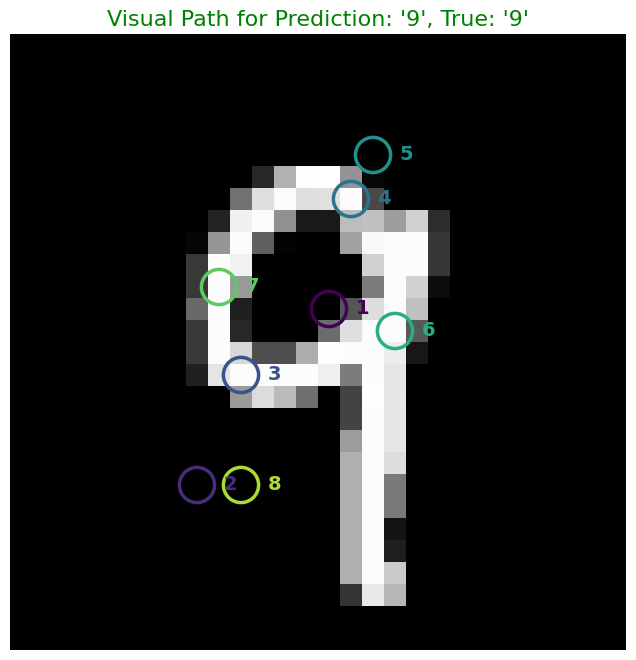

In [35]:
def visualize_decision_path(image_index, dt_model, X_test, y_test, test_dataset):
    """
    Visualize and explain the decision path of a Decision Tree classifier for a single image.

    This function shows:
      1. A step-by-step textual explanation of which pixels the tree inspects
         along the decision path, with pixel values translated into human-friendly categories
         (BACKGROUND, FAINT INK, INTENSE INK).
      2. The prediction compared to the true label.
      3. A graphical overlay of the inspected pixels on the original image, annotated with
         the order in which the tree considered them.

    Args:
        image_index (int): Index of the test image to analyze.
        dt_model (DecisionTreeClassifier): Trained scikit-learn decision tree model.
        X_test (np.ndarray): Test feature matrix (flattened images).
        y_test (np.ndarray or list): True labels corresponding to the test set.
        test_dataset (torchvision Dataset): Dataset containing the original images.

    """
    # Data Preparation and Rule Extraction
    image_for_prediction = X_test[image_index]
    image_for_visualization = test_dataset.data.numpy()[image_index]
    prediction = dt_model.predict([image_for_prediction])[0]
    true_label = y_test[image_index]

    tree_model = dt_model.tree_
    node_indicator = dt_model.decision_path([image_for_prediction])
    node_index = node_indicator.indices

    feature_indices = []
    thresholds = []
    for node_id in node_index:
        if dt_model.tree_.feature[node_id] != _tree.TREE_UNDEFINED:
            feature_idx = dt_model.tree_.feature[node_id]
            threshold = dt_model.tree_.threshold[node_id]
            feature_indices.append(feature_idx)
            thresholds.append(threshold)


    for i, feature_idx in enumerate(feature_indices):
        threshold = thresholds[i]
        pixel_value = image_for_prediction[feature_idx]

        # Pixel intensity translation, for a semplified and more readable way
        if pixel_value < 85:
            pixel_type = "BACKGROUND (value: 0-84)"
        elif pixel_value < 170:
            pixel_type = "FAINT INK (value: 85-169)"
        else:
            pixel_type = "INTENSE INK (value: 170+)"


        # Print the report combining pixel classification with the exact rule
        print(f"Step {i+1}: Model inspected a {pixel_type} pixel.")

    # model prediction and true label
    print(f"\nPrediction: {prediction}")
    print(f"True Label: {true_label}\n")

    # Graphical Visualization
    plt.figure(figsize=(8, 8))
    plt.imshow(image_for_visualization, cmap='gray')
    for i, feature_idx in enumerate(feature_indices):
        y = feature_idx // 28
        x = feature_idx % 28
        color = plt.cm.viridis(i / len(feature_indices))
        circle = plt.Circle((x, y), radius=0.8, color=color, fill=False, linewidth=2.5)
        plt.gca().add_patch(circle)
        plt.text(x + 1.2, y + 0.2, str(i + 1), color=color, fontsize=14, weight='bold')
    result_color = 'green' if prediction == true_label else 'red'
    plt.setp(plt.gca().spines.values(), color=result_color, linewidth=4)
    plt.title(f"Visual Path for Prediction: '{prediction}', True: '{true_label}'", fontsize=16, color = result_color)
    plt.axis('off')
    plt.show()


# let's try with 5 examples
num_examples_to_show = 5

# setting random test set indices
random_indices = random.sample(range(len(X_test)), num_examples_to_show)

# Analyze and print each of the selected random images
for index in random_indices:
    visualize_decision_path(index, dt_model, X_test, y_test, test_dataset)

# Notebook conclusions

This notebook shows that Explainable AI (XAI) is not a single method, but a “world full of wonders".  
Here we explored a selection of techniques, from gradient-based methods to perturbation-based approaches and model-agnostic frameworks, each with its own strengths and limitations.  
The goal was not to exhaustively cover every algorithm, but to provide a first comparative overview. I think that each technique (and its many variants) could justify a dedicated notebook (or even more) to fully understand its behavior, parameters, and best use cases.  
The key takeaway is that XAI is essential, now more than ever, as the world moves rapidly from simple, transparent white-box models to increasingly complex black-box architectures.  
Interpretability is critical for trust, compliance, and responsible AI adoption.